In [1]:
# import the required packages
import pandas as pd
import numpy as np
import re

# Visuals
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import matplotlib.dates as mdates
from datetime import datetime

import nltk
from collections import Counter
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### DPM, IRR, Inverter Sensor dataset from solar project dashboard

In [2]:
dpm = pd.read_excel('Solar Project Dashboard/DPMSensor_Energy_01Apr2023_To_01May2023__20230505120116.xlsx')
irr = pd.read_excel('Solar Project Dashboard/IRRSensor_Energy_01Apr2023_To_01May2023__20230505120222.xlsx')
inverter = pd.read_excel('Solar Project Dashboard/InverterSensor_Energy_01Apr2023_To_01May2023__20230505120137.xlsx')

In [3]:
dpm

,Date and Time,Location Code,Energy kWh
0,2023-04-01,SN2-NAP56-599489,75.24
1,2023-04-01,SN2-NAP72-599489,193.79
2,2023-04-01,SN2-NAP39-599489,498.52
3,2023-04-01,SN2-NAP83-599489,127.40
4,2023-04-01,SN2-NAP37-599489,341.76
...,...,...,...
426,2023-05-01,SN2-NAP83-599489,175.03
427,2023-05-01,SN2-NAP34-599489,157.10
428,2023-05-01,SN2-NAP47-599489,479.62
429,2023-05-01,SN2-NAP72-599489,267.38


In [4]:
dpm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  431 non-null    object 
 1   Location Code  431 non-null    object 
 2   Energy kWh     431 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.2+ KB


In [5]:
dpm['Sensor Type'] = 'DPM'
dpm

,Date and Time,Location Code,Energy kWh,Sensor Type
0,2023-04-01,SN2-NAP56-599489,75.24,DPM
1,2023-04-01,SN2-NAP72-599489,193.79,DPM
2,2023-04-01,SN2-NAP39-599489,498.52,DPM
3,2023-04-01,SN2-NAP83-599489,127.40,DPM
4,2023-04-01,SN2-NAP37-599489,341.76,DPM
...,...,...,...,...
426,2023-05-01,SN2-NAP83-599489,175.03,DPM
427,2023-05-01,SN2-NAP34-599489,157.10,DPM
428,2023-05-01,SN2-NAP47-599489,479.62,DPM
429,2023-05-01,SN2-NAP72-599489,267.38,DPM


In [6]:
irr

,Date and Time,Location Code,Energy kWh
0,2023-04-01,SN2-NAP81-599489,3504.383
1,2023-04-02,SN2-NAP81-599489,4330.500
2,2023-04-03,SN2-NAP81-599489,1401.033
3,2023-04-04,SN2-NAP81-599489,6164.450
4,2023-04-05,SN2-NAP81-599489,2002.633
5,2023-04-06,SN2-NAP81-599489,4047.352
6,2023-04-07,SN2-NAP81-599489,2470.783
7,2023-04-08,SN2-NAP81-599489,4205.600
8,2023-04-09,SN2-NAP81-599489,4038.250
9,2023-04-10,SN2-NAP81-599489,4478.400


In [7]:
irr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  31 non-null     object 
 1   Location Code  31 non-null     object 
 2   Energy kWh     31 non-null     float64
dtypes: float64(1), object(2)
memory usage: 872.0+ bytes


In [8]:
irr['Sensor Type'] = 'IRR'
irr

,Date and Time,Location Code,Energy kWh,Sensor Type
0,2023-04-01,SN2-NAP81-599489,3504.383,IRR
1,2023-04-02,SN2-NAP81-599489,4330.500,IRR
2,2023-04-03,SN2-NAP81-599489,1401.033,IRR
3,2023-04-04,SN2-NAP81-599489,6164.450,IRR
4,2023-04-05,SN2-NAP81-599489,2002.633,IRR
5,2023-04-06,SN2-NAP81-599489,4047.352,IRR
6,2023-04-07,SN2-NAP81-599489,2470.783,IRR
7,2023-04-08,SN2-NAP81-599489,4205.600,IRR
8,2023-04-09,SN2-NAP81-599489,4038.250,IRR
9,2023-04-10,SN2-NAP81-599489,4478.400,IRR


In [9]:
inverter

,Date and Time,Location Code,Energy kWh
0,2023-04-01,SN2-NAPCC-599489,409.68
1,2023-04-01,SN2-NAP56-599489,77.97
2,2023-04-01,SN2-NAP81-599489,283.17
3,2023-04-01,SN2-NAP72-599489,198.36
4,2023-04-01,SN2-NAP40-599489,515.12
...,...,...,...
426,2023-05-01,SN2-NAP47-599489,484.07
427,2023-05-01,SN2-NAP34-599489,167.11
428,2023-05-01,SN2-NAP80-599489,0.00
429,2023-05-01,SN2-NAP72-599489,267.96


In [10]:
inverter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  431 non-null    object 
 1   Location Code  431 non-null    object 
 2   Energy kWh     431 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.2+ KB


In [11]:
inverter['Sensor Type'] = 'Inverter'
inverter

,Date and Time,Location Code,Energy kWh,Sensor Type
0,2023-04-01,SN2-NAPCC-599489,409.68,Inverter
1,2023-04-01,SN2-NAP56-599489,77.97,Inverter
2,2023-04-01,SN2-NAP81-599489,283.17,Inverter
3,2023-04-01,SN2-NAP72-599489,198.36,Inverter
4,2023-04-01,SN2-NAP40-599489,515.12,Inverter
...,...,...,...,...
426,2023-05-01,SN2-NAP47-599489,484.07,Inverter
427,2023-05-01,SN2-NAP34-599489,167.11,Inverter
428,2023-05-01,SN2-NAP80-599489,0.00,Inverter
429,2023-05-01,SN2-NAP72-599489,267.96,Inverter


### Exploration

In [12]:
df = pd.concat([dpm, irr, inverter], axis=0)
df

,Date and Time,Location Code,Energy kWh,Sensor Type
0,2023-04-01,SN2-NAP56-599489,75.24,DPM
1,2023-04-01,SN2-NAP72-599489,193.79,DPM
2,2023-04-01,SN2-NAP39-599489,498.52,DPM
3,2023-04-01,SN2-NAP83-599489,127.40,DPM
4,2023-04-01,SN2-NAP37-599489,341.76,DPM
...,...,...,...,...
426,2023-05-01,SN2-NAP47-599489,484.07,Inverter
427,2023-05-01,SN2-NAP34-599489,167.11,Inverter
428,2023-05-01,SN2-NAP80-599489,0.00,Inverter
429,2023-05-01,SN2-NAP72-599489,267.96,Inverter


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 430
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  893 non-null    object 
 1   Location Code  893 non-null    object 
 2   Energy kWh     893 non-null    float64
 3   Sensor Type    893 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.9+ KB


In [14]:
df['Date and Time'] = pd.to_datetime(df['Date and Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 430
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and Time  893 non-null    datetime64[ns]
 1   Location Code  893 non-null    object        
 2   Energy kWh     893 non-null    float64       
 3   Sensor Type    893 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 34.9+ KB


In [15]:
df['block'] = df['Location Code'].str[7:9]
df

,Date and Time,Location Code,Energy kWh,Sensor Type,block
0,2023-04-01,SN2-NAP56-599489,75.24,DPM,56
1,2023-04-01,SN2-NAP72-599489,193.79,DPM,72
2,2023-04-01,SN2-NAP39-599489,498.52,DPM,39
3,2023-04-01,SN2-NAP83-599489,127.40,DPM,83
4,2023-04-01,SN2-NAP37-599489,341.76,DPM,37
...,...,...,...,...,...
426,2023-05-01,SN2-NAP47-599489,484.07,Inverter,47
427,2023-05-01,SN2-NAP34-599489,167.11,Inverter,34
428,2023-05-01,SN2-NAP80-599489,0.00,Inverter,80
429,2023-05-01,SN2-NAP72-599489,267.96,Inverter,72


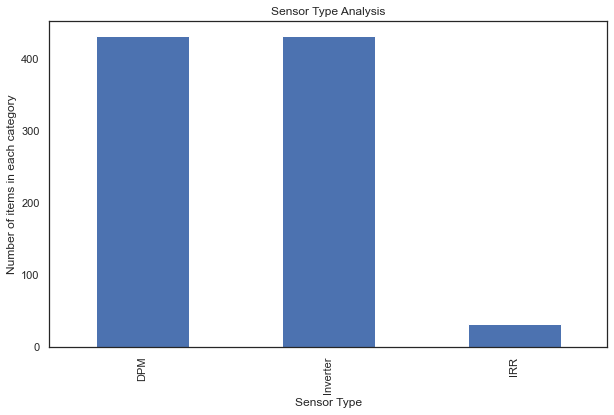

In [16]:
sensor = df['Sensor Type'].value_counts() 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sensor.sort_values(ascending=False).plot(kind='bar', ax=ax)

ax.set_ylabel('Number of items in each category')
ax.set_xlabel('Sensor Type')
ax.set_title('Sensor Type Analysis')

plt.show()

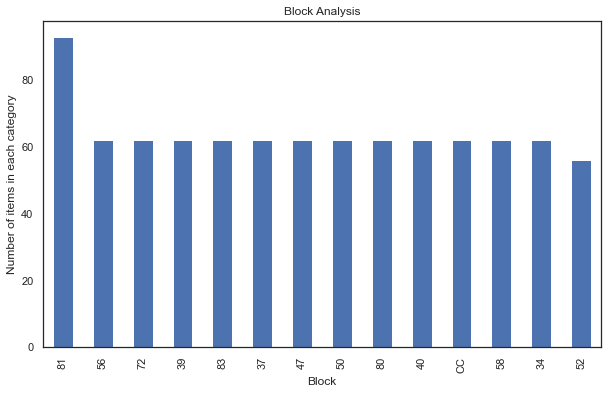

In [17]:
label_freq = df['block'].value_counts() 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

label_freq.sort_values(ascending=False).plot(kind='bar', ax=ax)

ax.set_ylabel('Number of items in each category')
ax.set_xlabel('Block')
ax.set_title('Block Analysis')

plt.show()

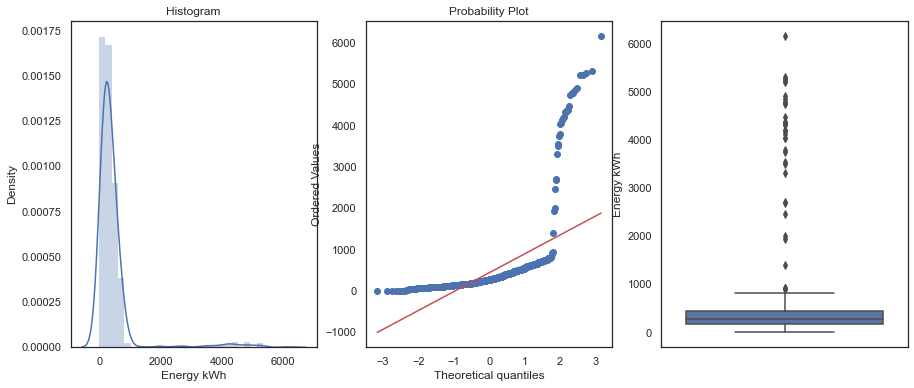

Number of outliers in Energy kWh: 35


In [18]:
#outlier detection
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 3, 1)
    plt.rcParams["patch.edgecolor"] = "none"
    sns.histplot(df[variable], bins=30, kde = True, stat ="density", kde_kws=dict(cut = 3),alpha = 0.30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])

    plt.show()
    
    # Count outliers using IQR method
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]

    print(f'Number of outliers in {variable}: {len(outliers)}')
    
diagnostic_plots(df, 'Energy kWh')

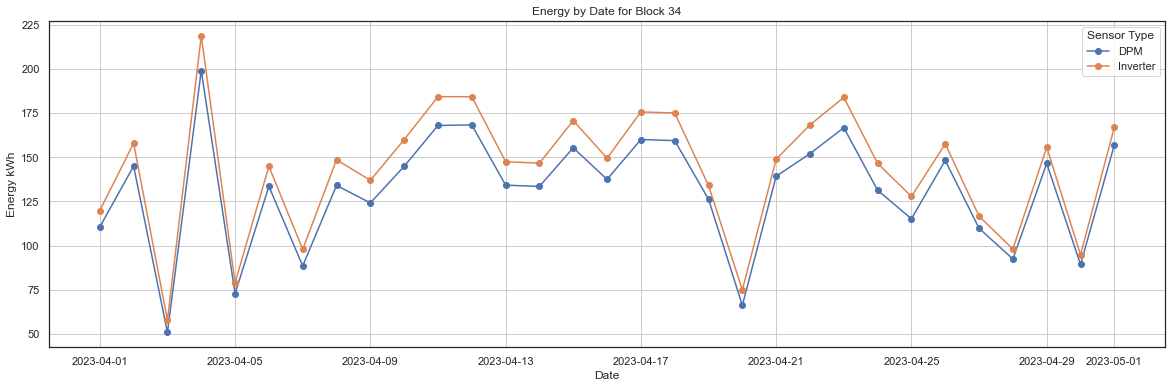

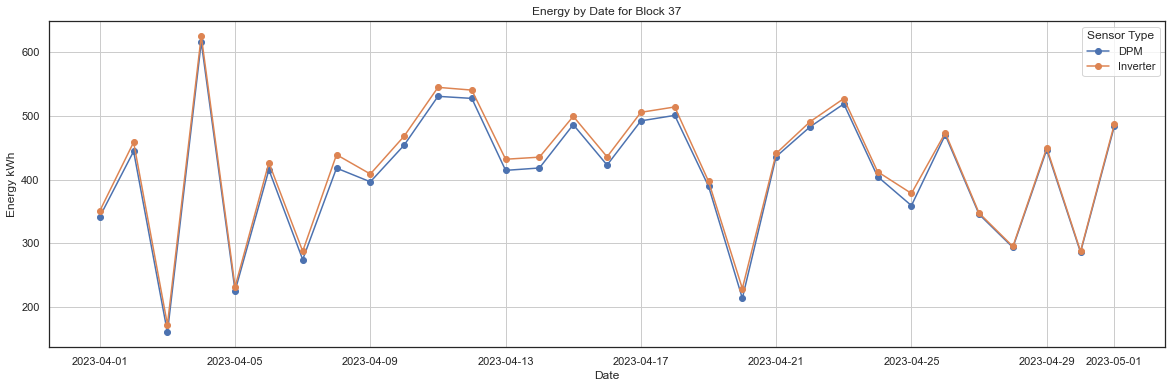

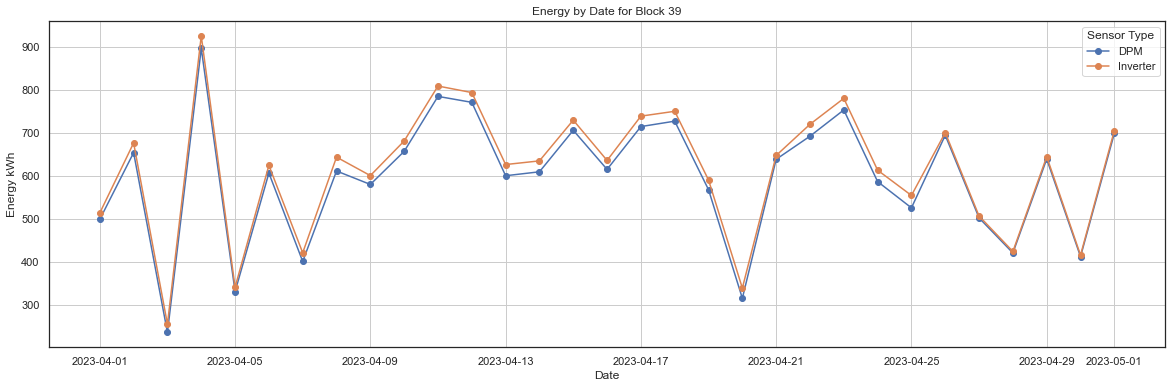

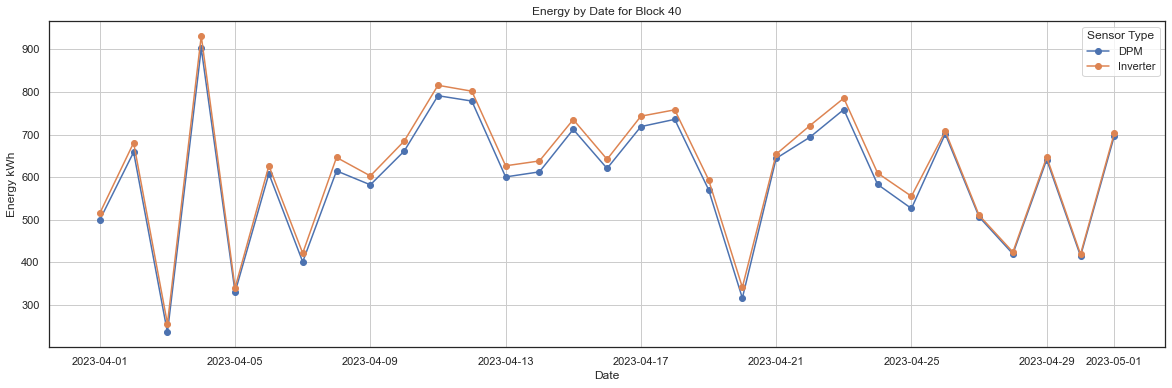

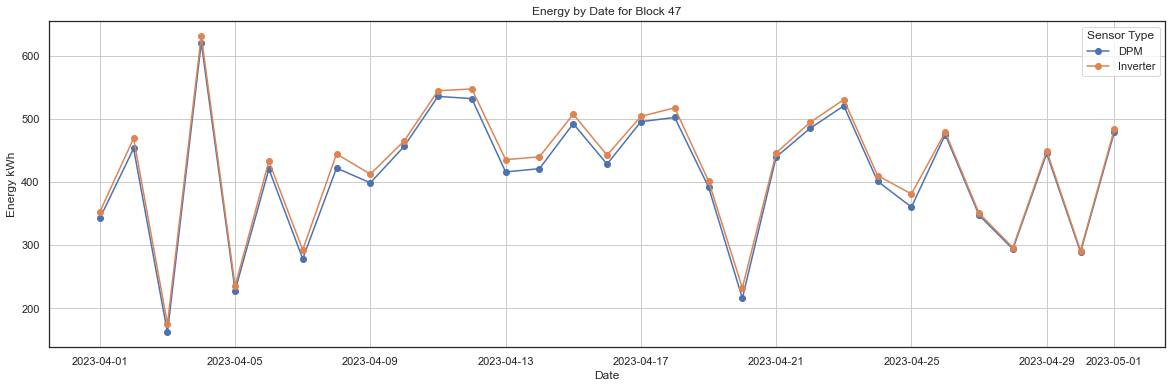

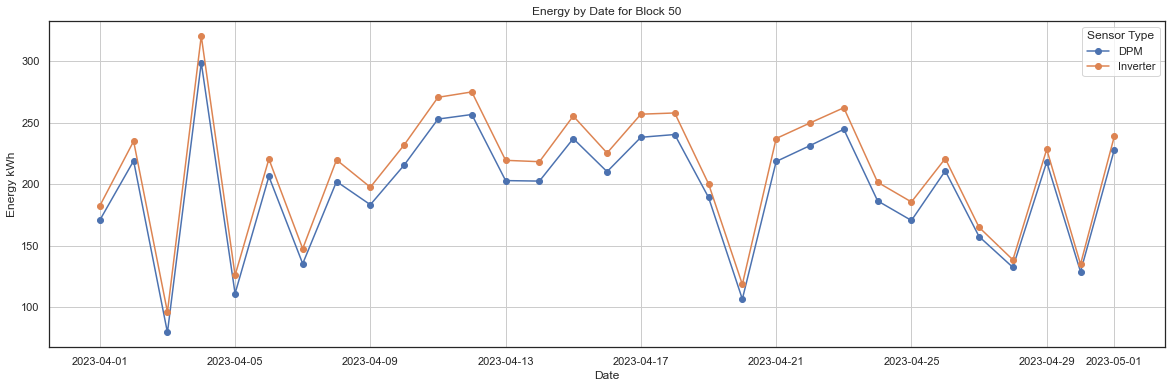

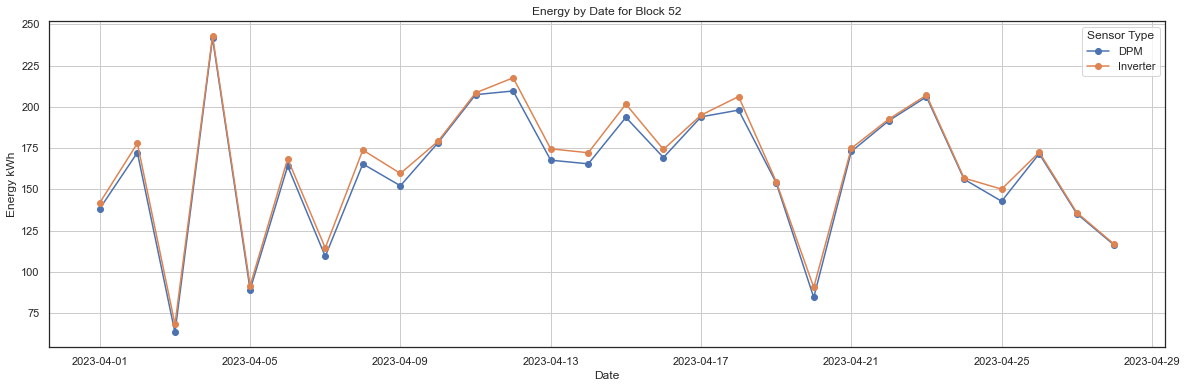

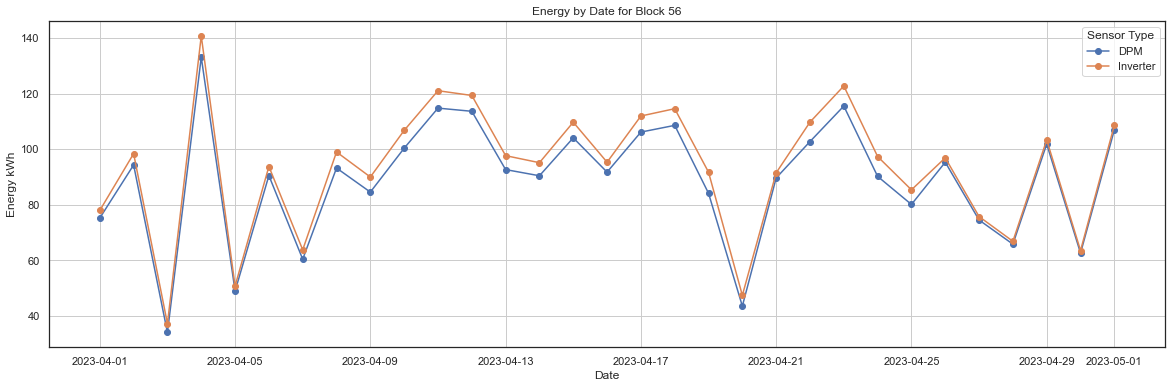

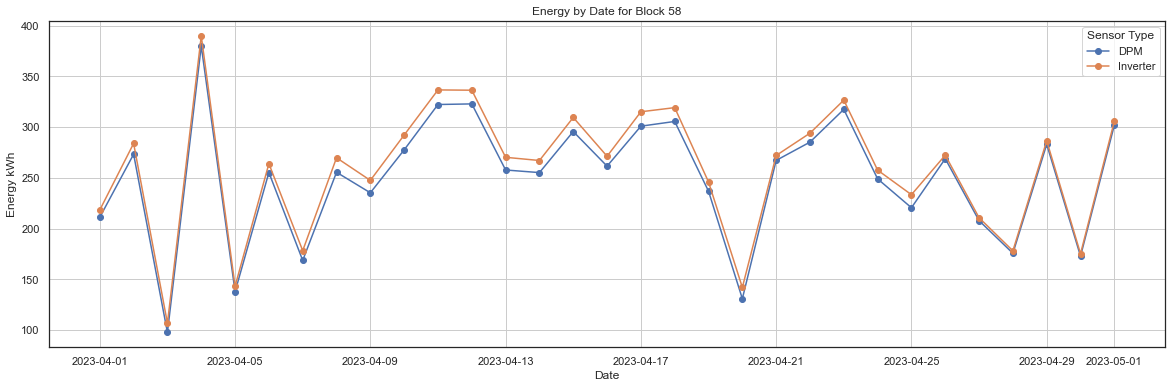

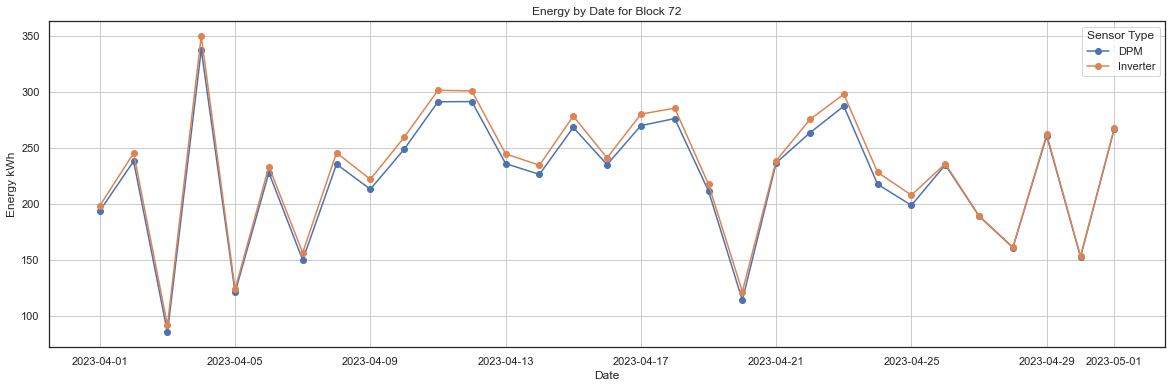

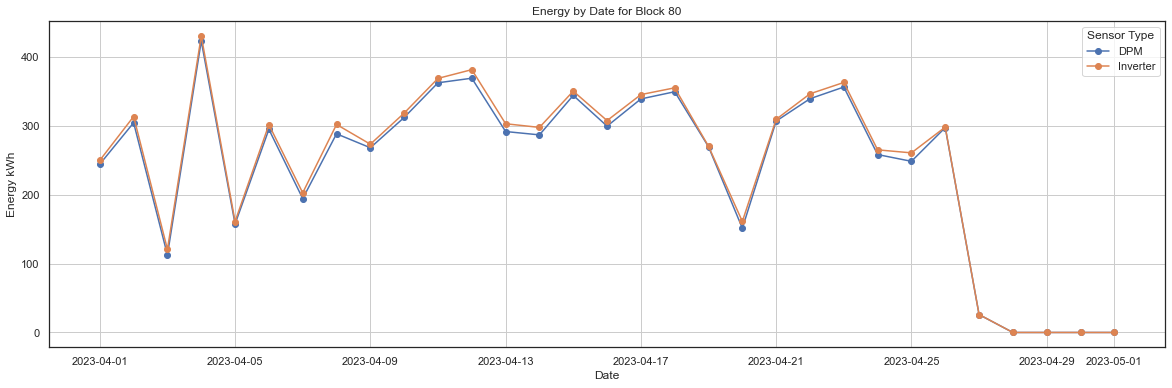

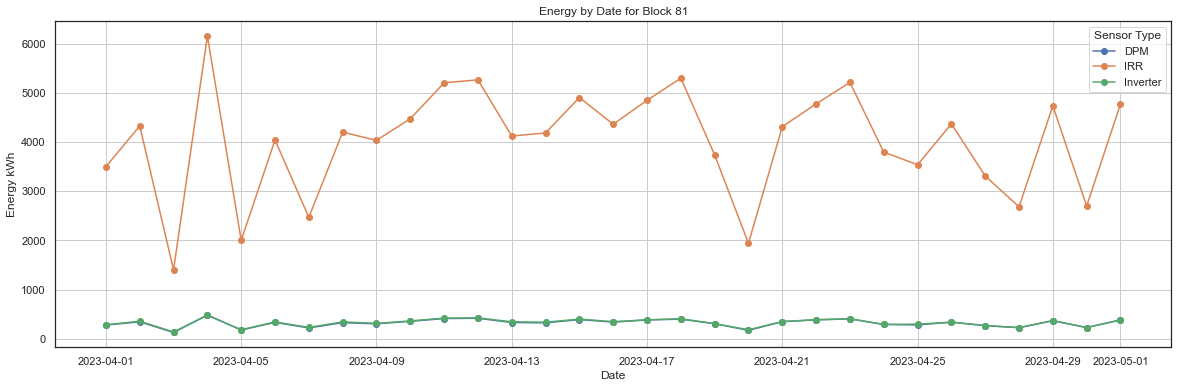

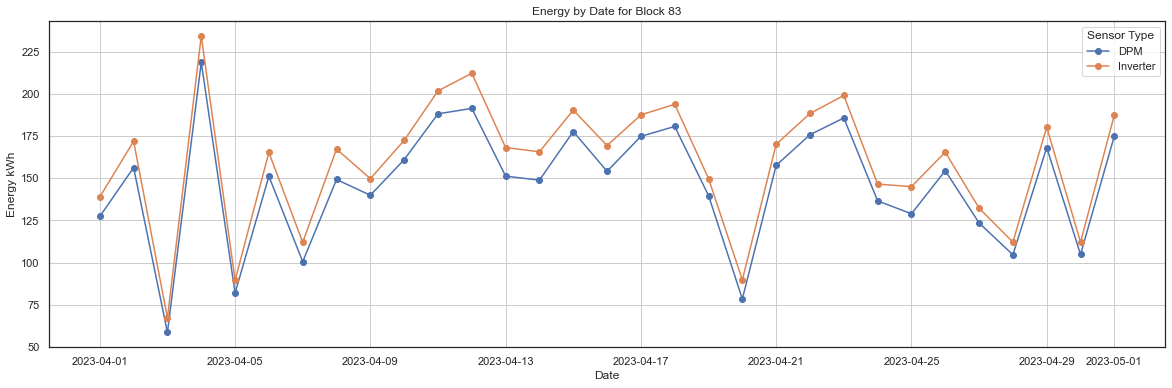

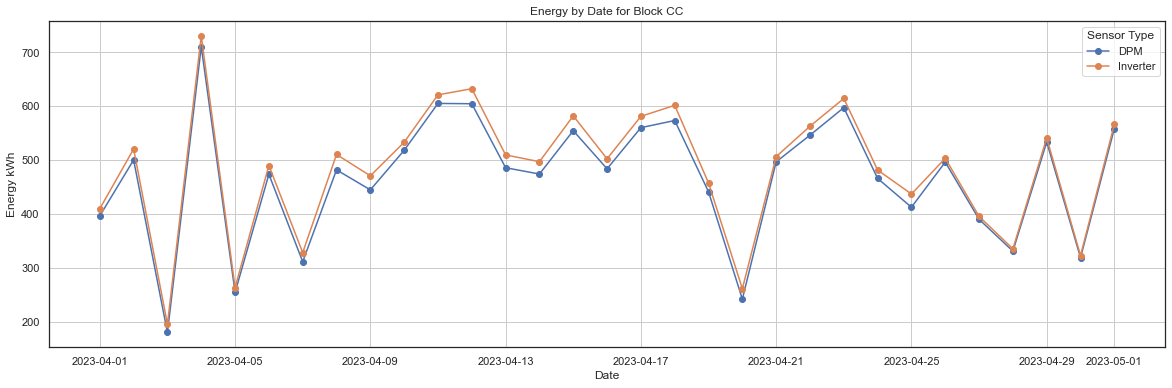

In [19]:
# Energy generated per block by date and sensor type
grouped_data = df.pivot_table(index='Date and Time', columns=['block', 'Sensor Type'], values='Energy kWh', aggfunc='sum')

# Plot multiline chart
for block in grouped_data.columns.levels[0]:
    plt.figure(figsize=(20, 6))
    for sensor_type in grouped_data[block].columns:
        plt.plot(grouped_data.index, grouped_data[block][sensor_type], marker='o', label=sensor_type)
    plt.title(f'Energy by Date for Block {block}')
    plt.xlabel('Date')
    plt.ylabel('Energy kWh')
    plt.legend(title='Sensor Type')
    plt.grid(True)
    plt.show()

### dpm sensor from estate office 

In [20]:
dpm24_01 = pd.read_excel('Estate office Custom report for datasets/2024/DPM/Energy_01Jan2024_To_30Jan2024__DPM.xlsx')
dpm24_02 = pd.read_excel('Estate office Custom report for datasets/2024/DPM/Energy_01Feb2024_To_29Feb2024__DPM.xlsx')
dpm24_03 = pd.read_excel('Estate office Custom report for datasets/2024/DPM/Energy_01Mar2024_To_30Mar2024__DPM.xlsx')
dpm24_04 = pd.read_excel('Estate office Custom report for datasets/2024/DPM/Energy_01Apr2024_To_30Apr2024__DPM.xlsx')

dpm23_01 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Jan2023_To_30Jan2023__DPM.xlsx')
dpm23_02 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Feb2023_To_28Feb2023__DPM.xlsx')
dpm23_03 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Mar2023_To_30Mar2023__DPM.xlsx')
dpm23_04 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Apr2023_To_30Apr2023__DPM.xlsx')
dpm23_05 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01May2023_To_30May2023__DPM.xlsx')
dpm23_06 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Jun2023_To_30Jun2023__DPM.xlsx')
dpm23_07 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Jul2023_To_30Jul2023__DPM.xlsx')
dpm23_08 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Aug2023_To_30Aug2023_DPM.xlsx')
dpm23_09 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Sep2023_To_30Sep2023__DPM.xlsx')
dpm23_10 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Oct2023_To_30Oct2023__DPM.xlsx')
dpm23_11 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Nov2023_To_30Nov2023__DPM.xlsx')
dpm23_12 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Dec2023_To_30Dec2023__DPM.xlsx')

dpm22_01 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Jan2022_To_30Jan2022__DPM.xlsx')
dpm22_02 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Feb2022_To_28Feb2022__DPM.xlsx')
dpm22_03 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Mar2022_To_30Mar2022__DPM.xlsx')
dpm22_04 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Apr2022_To_30Apr2022__DPM.xlsx')
dpm22_05 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01May2022_To_31May2022__DPM.xlsx')
dpm22_06 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Jun2022_To_30Jun2022__DPM.xlsx')
dpm22_07 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Jul2022_To_30Jul2022__DPM.xlsx')
dpm22_08 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Aug2022_To_30Aug2022__DPM.xlsx')
dpm22_09 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Sep2022_To_01Sep2022__DPM.xlsx')
dpm22_10 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Oct2022_To_30Oct2022__DPM.xlsx')
dpm22_11 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Nov2022_To_30Nov2022__DPM.xlsx')
dpm22_12 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Dec2022_To_30Dec2022__DPM.xlsx')

dpm21_01 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Jan2021_To_30Jan2021__DPM.xlsx')
dpm21_02 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Feb2021_To_28Feb2021__DPM.xlsx')
dpm21_03 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Mar2021_To_30Mar2021__DPM.xlsx')
dpm21_04 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Apr2021_To_30Apr2021__DPM.xlsx')
dpm21_05 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01May2021_To_30May2021__DPM.xlsx')
dpm21_06 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Jun2021_To_30Jun2021__DPM.xlsx')
dpm21_07 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Jul2021_To_30Jul2021__DPM.xlsx')
dpm21_08 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Aug2021_To_01Aug2021__DPM.xlsx')
dpm21_09 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Sep2021_To_30Sep2021__DPM.xlsx')
dpm21_10 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Oct2021_To_30Oct2021_DPM.xlsx')
dpm21_11 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Nov2021_To_30Nov2021_DM.xlsx')
dpm21_12 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Dec2021_To_30Dec2021__DPM.xlsx')


In [21]:
dpm21 = [dpm21_01, dpm21_02, dpm21_03, dpm21_04, dpm21_05, dpm21_06, dpm21_07, dpm21_08, dpm21_09, dpm21_10, dpm21_11, dpm21_12]
dpm22 = [dpm22_01, dpm22_02, dpm22_03, dpm22_04, dpm22_05, dpm22_06, dpm22_07, dpm22_08, dpm22_09, dpm22_10, dpm22_11, dpm22_12]
dpm23 = [dpm23_01, dpm23_02, dpm23_03, dpm23_04, dpm23_05, dpm23_06, dpm23_07, dpm23_08, dpm23_09, dpm23_10, dpm23_11, dpm23_12]
dpm24 = [dpm24_01, dpm24_02, dpm24_03, dpm24_04]

# Concatenate DataFrames
df_dpm = pd.concat(dpm21 + dpm22 + dpm23 + dpm24, axis=0)
df_dpm

,Date and Time,Location Code,IRR Value W/m²,Energy kWh,Expected Value kWh,PR %,Sensor ID,Sensor Type,Energy Generation
0,2021-01-01,SN2-NAP72-599489,0.000,41.21,0.00,0.00,DPM-599489-01,DPM,41.21
1,2021-01-02,SN2-NAP72-599489,0.000,7.45,0.00,0.00,DPM-599489-01,DPM,7.45
2,2021-01-03,SN2-NAP72-599489,0.000,67.86,0.00,0.00,DPM-599489-01,DPM,67.86
3,2021-01-04,SN2-NAP72-599489,2440.595,126.32,157.85,80.03,DPM-599489-01,DPM,126.32
4,2021-01-05,SN2-NAP72-599489,4479.086,235.24,289.68,81.21,DPM-599489-01,DPM,235.24
...,...,...,...,...,...,...,...,...,...
408,2024-04-26,SN2-NAP58-599489,4379.833,256.56,303.19,84.62,DPM-599489-16,DPM,256.56
409,2024-04-27,SN2-NAP58-599489,4268.050,250.62,295.46,84.82,DPM-599489-16,DPM,250.62
410,2024-04-28,SN2-NAP58-599489,3990.756,244.31,276.26,88.43,DPM-599489-16,DPM,244.31
411,2024-04-29,SN2-NAP58-599489,5386.331,305.01,372.87,81.80,DPM-599489-16,DPM,305.01


In [22]:
df_dpm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17943 entries, 0 to 412
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date and Time       17943 non-null  object 
 1   Location Code       17943 non-null  object 
 2   IRR Value W/m²      17943 non-null  float64
 3   Energy kWh          17943 non-null  float64
 4   Expected Value kWh  17943 non-null  float64
 5   PR %                17943 non-null  float64
 6   Sensor ID           17943 non-null  object 
 7   Sensor Type         17943 non-null  object 
 8   Energy Generation   17943 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.4+ MB


In [23]:
#univariate 
df_dpm.describe()

,IRR Value W/m²,Energy kWh,Expected Value kWh,PR %,Energy Generation
count,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000
mean,3819.032599,320.974956,295.649461,85.075528,320.974956
std,1370.856748,3139.764206,166.212470,11.220944,3139.764206
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2928.750000,152.390000,168.570000,84.040000,152.390000
50%,3972.674000,242.220000,273.080000,87.780000,242.220000
75%,4836.467000,345.940000,398.590000,89.990000,345.940000
max,6876.086000,378419.790000,1014.570000,90.000000,378419.790000


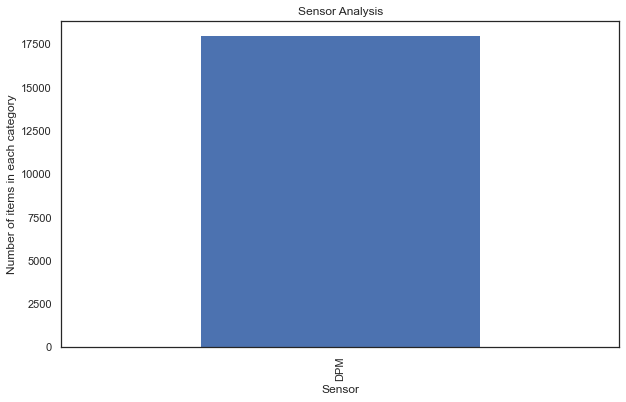

In [24]:
#exploring sensor type just in case data not only have dpm sensor 
sensortype = df_dpm['Sensor Type'].value_counts() 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sensortype.sort_values(ascending=False).plot(kind='bar', ax=ax)

ax.set_ylabel('Number of items in each category')
ax.set_xlabel('Sensor')
ax.set_title('Sensor Analysis')

plt.show()

In [25]:
#PR < 80% means bad weather condition 
# Filter rows where PR % is less than 80
pr_less_than_80 = df_dpm[df_dpm['PR %'] < 80]

# Display the count
print("Number of PR % values less than 80%:", len(pr_less_than_80))
pr_less_than_80

Number of PR % values less than 80%: 1626


,Date and Time,Location Code,IRR Value W/m²,Energy kWh,Expected Value kWh,PR %,Sensor ID,Sensor Type,Energy Generation
0,2021-01-01,SN2-NAP72-599489,0.000,41.21,0.00,0.00,DPM-599489-01,DPM,41.21
1,2021-01-02,SN2-NAP72-599489,0.000,7.45,0.00,0.00,DPM-599489-01,DPM,7.45
2,2021-01-03,SN2-NAP72-599489,0.000,67.86,0.00,0.00,DPM-599489-01,DPM,67.86
9,2021-01-10,SN2-NAP72-599489,278.867,13.29,18.04,73.67,DPM-599489-01,DPM,13.29
12,2021-01-13,SN2-NAP72-599489,2458.128,77.82,158.98,48.95,DPM-599489-01,DPM,77.82
...,...,...,...,...,...,...,...,...,...
312,2024-04-14,SN2-NAP40-599489,3116.100,196.78,247.11,79.63,DPM-599489-13,DPM,196.78
317,2024-04-19,SN2-NAP40-599489,4204.550,266.17,333.42,79.83,DPM-599489-13,DPM,266.17
320,2024-04-22,SN2-NAP40-599489,4236.017,267.33,335.92,79.58,DPM-599489-13,DPM,267.33
325,2024-04-27,SN2-NAP40-599489,4268.050,264.92,338.46,78.27,DPM-599489-13,DPM,264.92


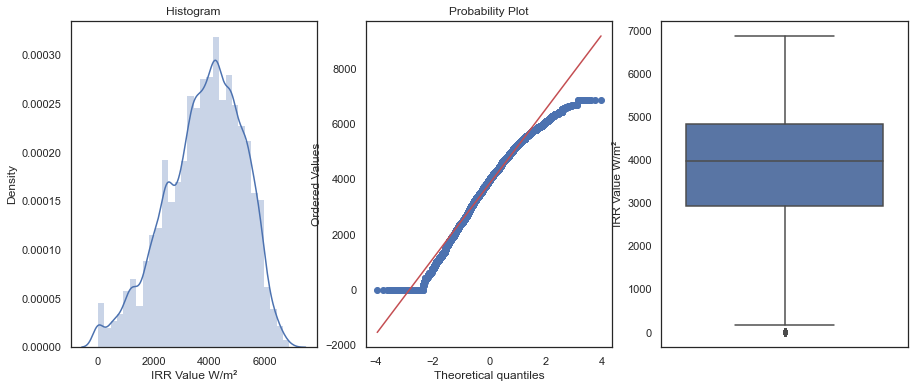

Number of outliers in IRR Value W/m²: 170


In [26]:
#outlier detection
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 3, 1)
    plt.rcParams["patch.edgecolor"] = "none"
    sns.histplot(df[variable], bins=30, kde = True, stat ="density", kde_kws=dict(cut = 3),alpha = 0.30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])

    plt.show()
    
    # Count outliers using IQR method
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]

    print(f'Number of outliers in {variable}: {len(outliers)}')
    
diagnostic_plots(df_dpm, 'IRR Value W/m²')

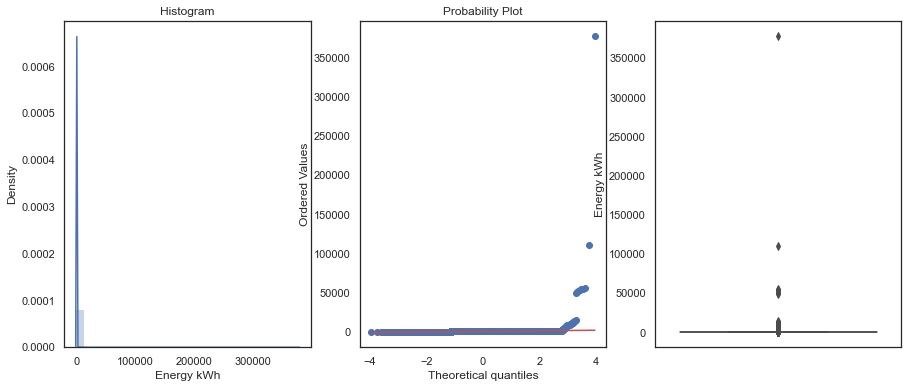

Number of outliers in Energy kWh: 254


In [27]:
diagnostic_plots(df_dpm, 'Energy kWh')

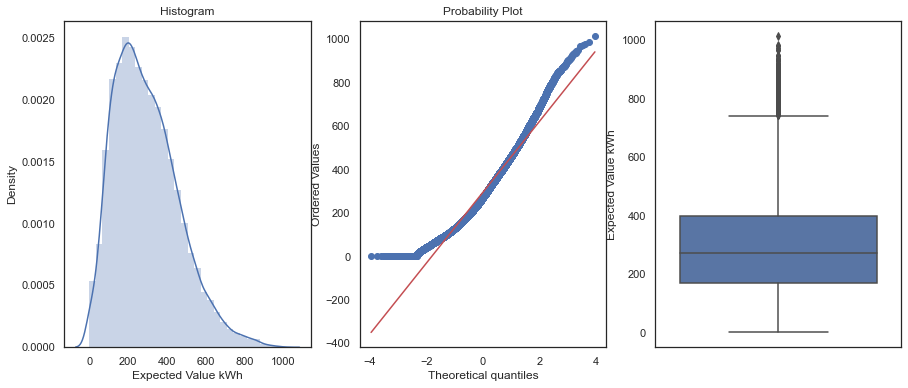

Number of outliers in Expected Value kWh: 240


In [28]:
diagnostic_plots(df_dpm, 'Expected Value kWh')

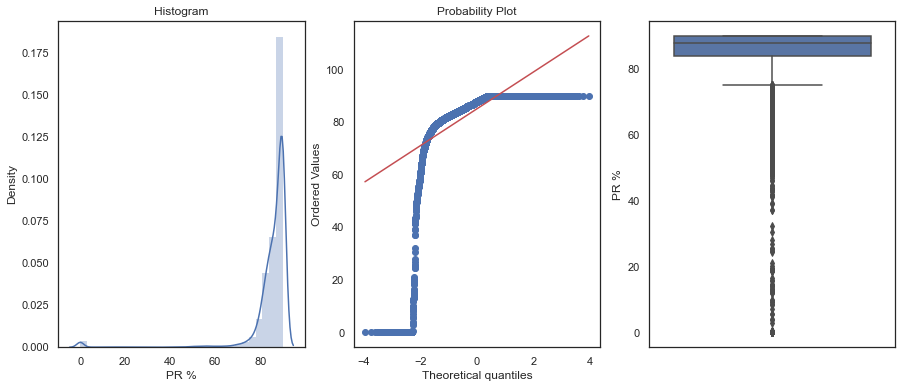

Number of outliers in PR %: 801


In [29]:
diagnostic_plots(df_dpm, 'PR %')

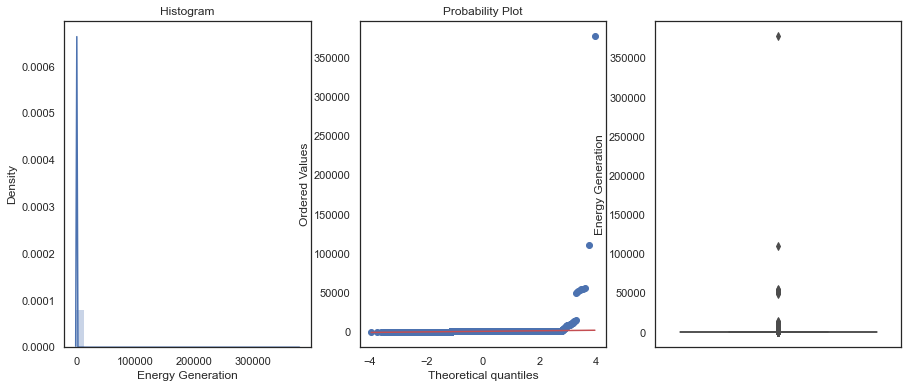

Number of outliers in Energy Generation: 254


In [30]:
diagnostic_plots(df_dpm, 'Energy Generation')

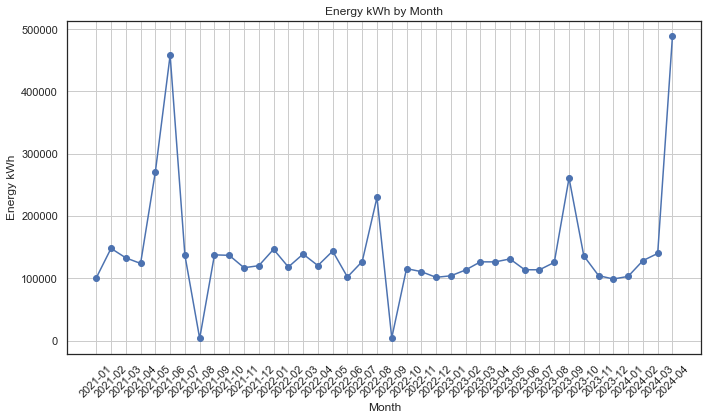

In [31]:
#bivariate 
#comparing expected vs reality energy kwh 
# Convert 'Date and Time' to datetime object
df_dpm['Date and Time'] = pd.to_datetime(df_dpm['Date and Time'])

# Extract month and year
df_dpm['Month'] = df_dpm['Date and Time'].dt.strftime('%Y-%m')

# Group by month and sum the values
energy_per_month= df_dpm.groupby('Month')['Energy kWh'].sum()

# Prepare data for plotting
x = energy_per_month.index
y = energy_per_month.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='b')

plt.title('Energy kWh by Month')
plt.xlabel('Month')
plt.ylabel('Energy kWh')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

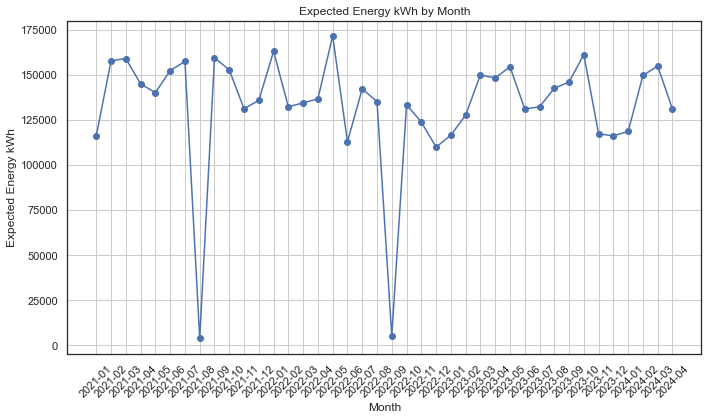

In [32]:
# Group by month and sum the values
expected_energy = df_dpm.groupby('Month')['Expected Value kWh'].sum()

# Prepare data for plotting
x = expected_energy.index
y = expected_energy.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='b')

plt.title('Expected Energy kWh by Month')
plt.xlabel('Month')
plt.ylabel('Expected Energy kWh')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

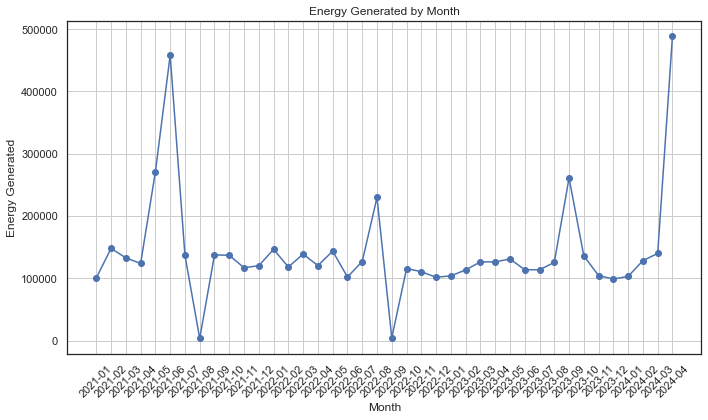

In [33]:
# Group by month and sum the values
energy_generated = df_dpm.groupby('Month')['Energy Generation'].sum()

# Prepare data for plotting
x = energy_generated.index
y = energy_generated.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='b')

plt.title('Energy Generated by Month')
plt.xlabel('Month')
plt.ylabel('Energy Generated')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

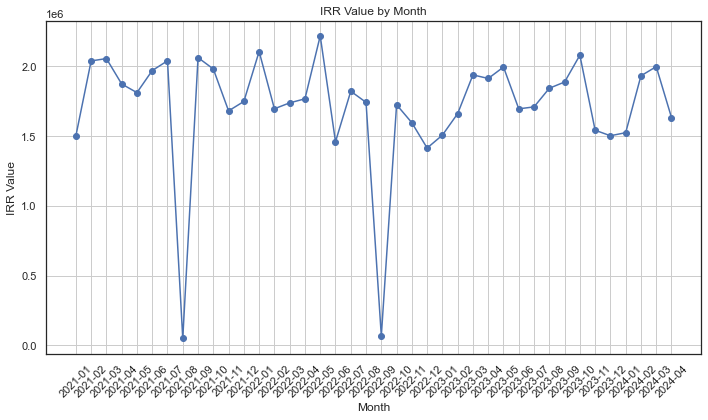

In [34]:
# Group by month and sum the values
irr_value = df_dpm.groupby('Month')['IRR Value W/m²'].sum()

# Prepare data for plotting
x = irr_value.index
y = irr_value.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='b')

plt.title('IRR Value by Month')
plt.xlabel('Month')
plt.ylabel('IRR Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

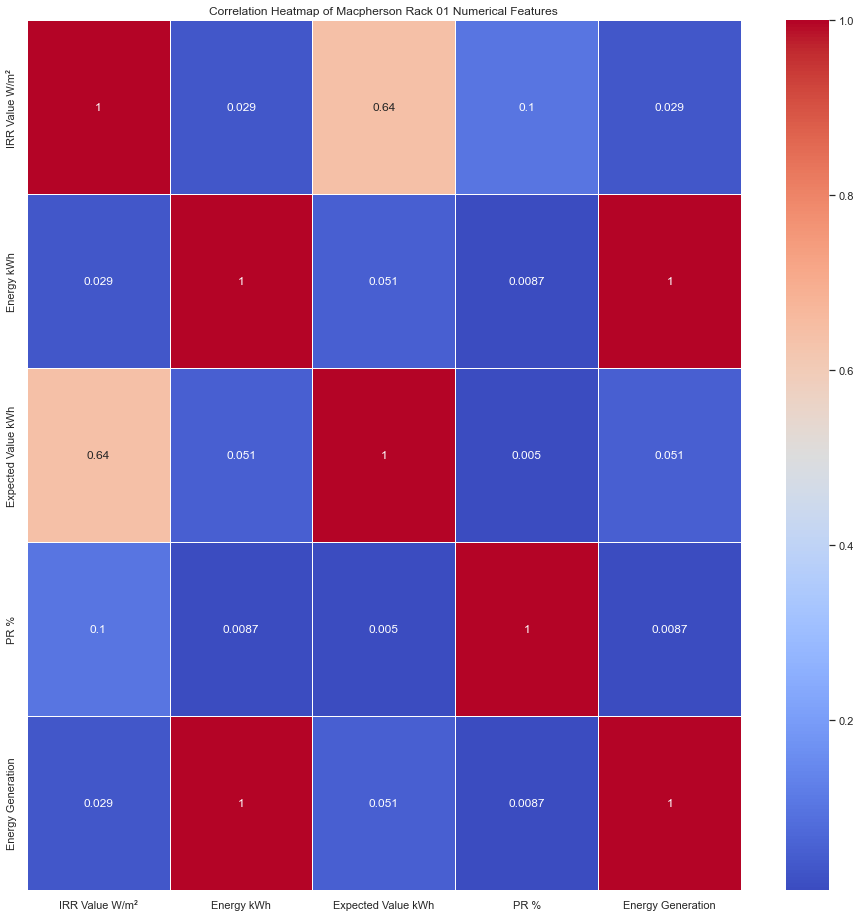

In [35]:
#Understanding the correlation of variables by showing the correlation matrix on a heatmap 

dpm_num = df_dpm.select_dtypes(include=['float64', 'int64']).copy()

# Compute the correlation matrix
correlation_matrix = dpm_num.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 16))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap of Macpherson Rack 01 Numerical Features')
plt.show()

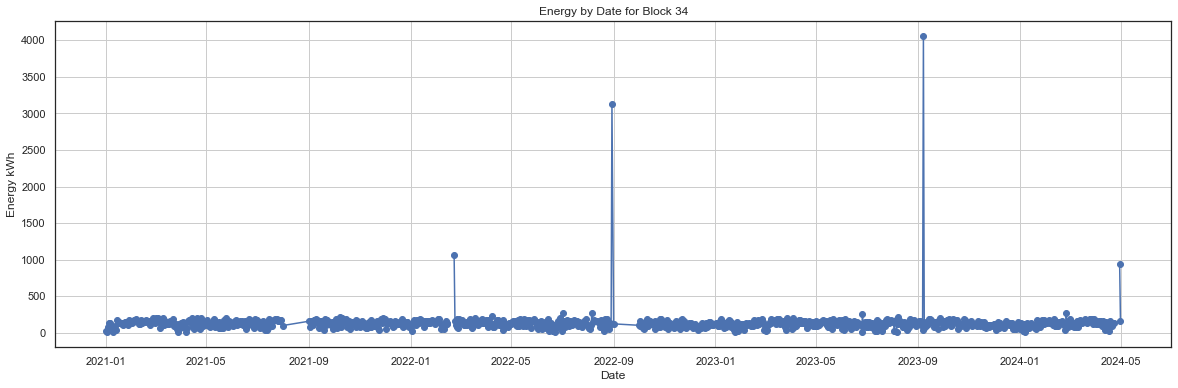

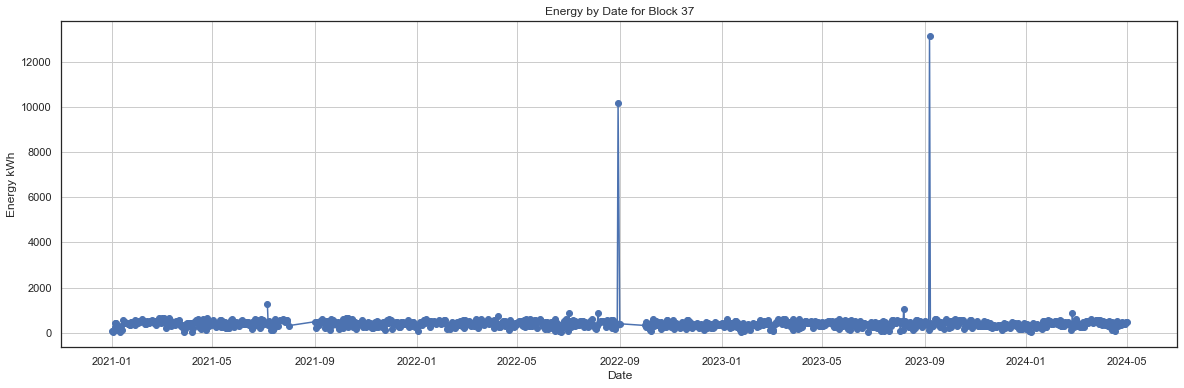

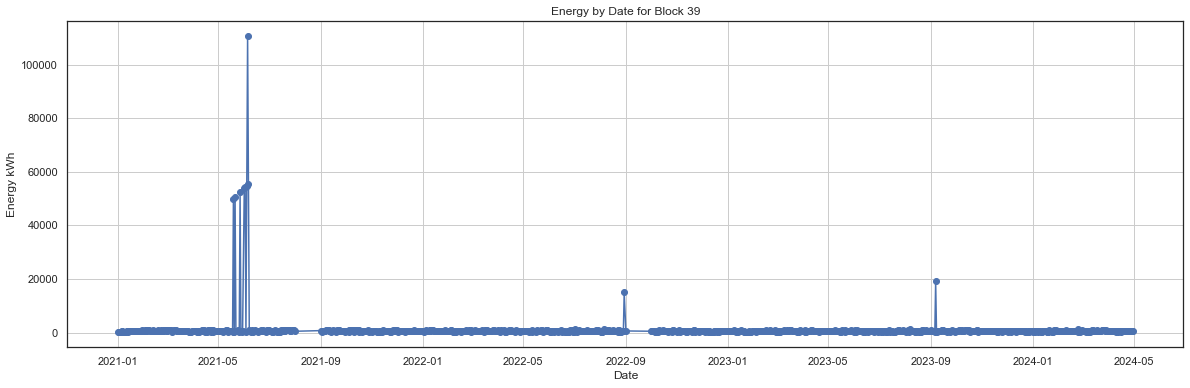

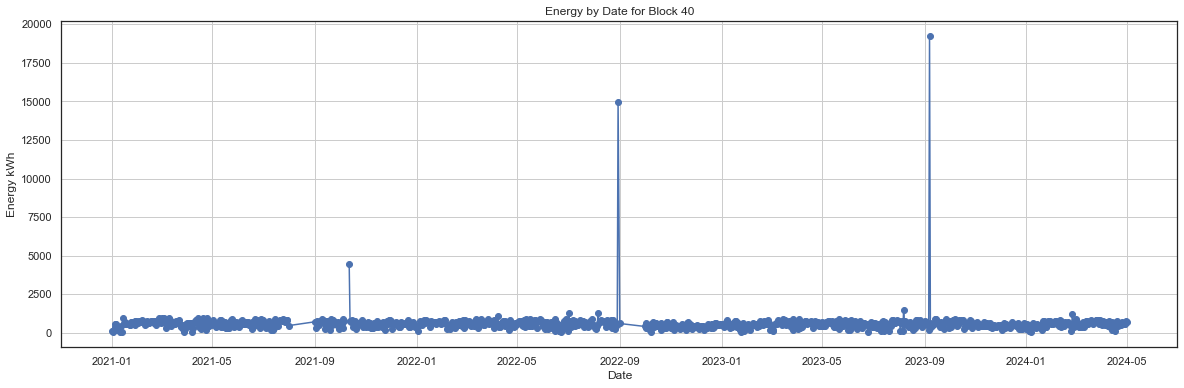

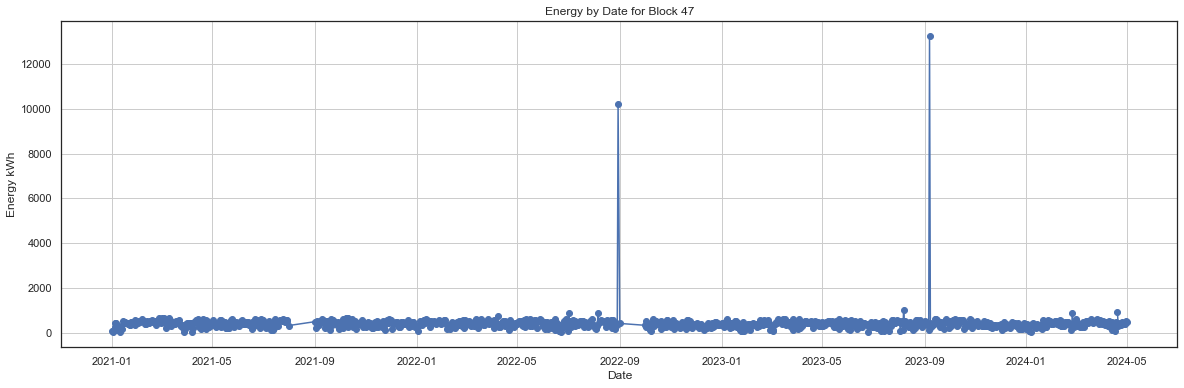

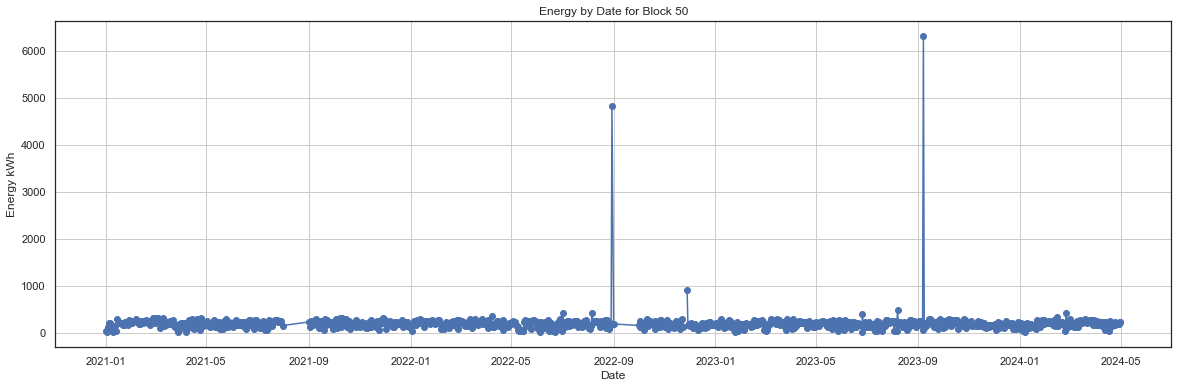

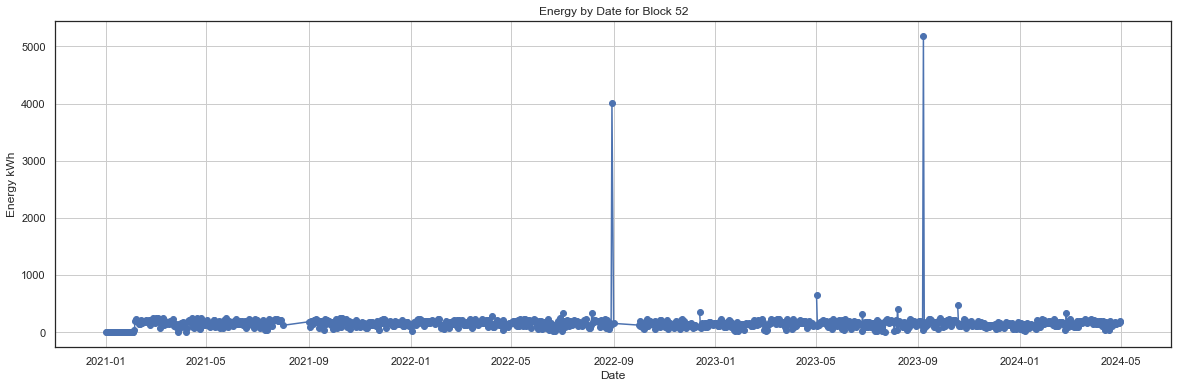

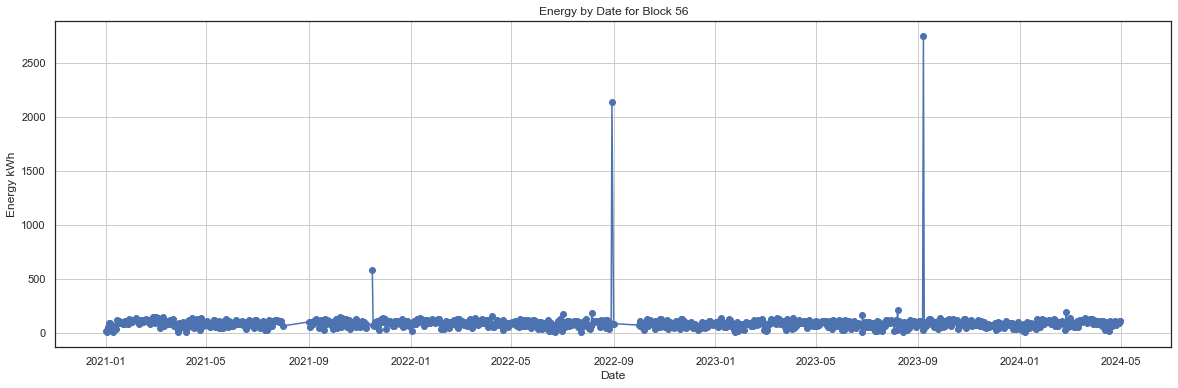

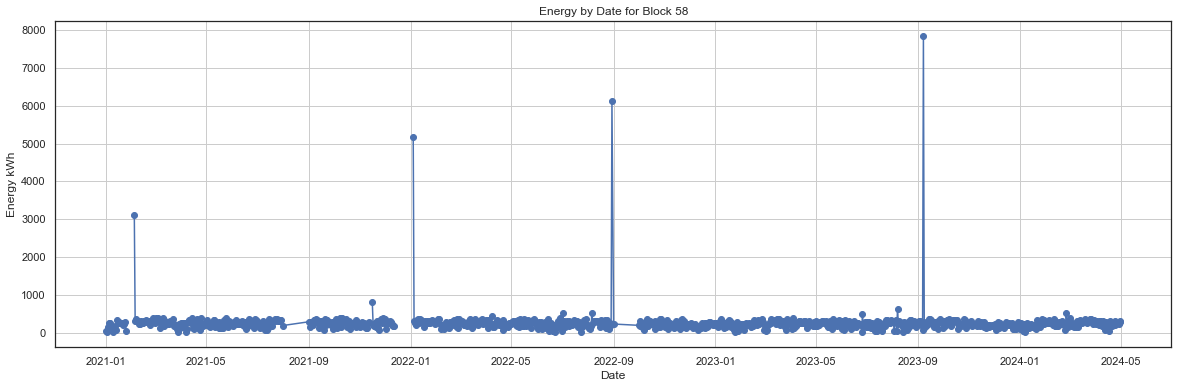

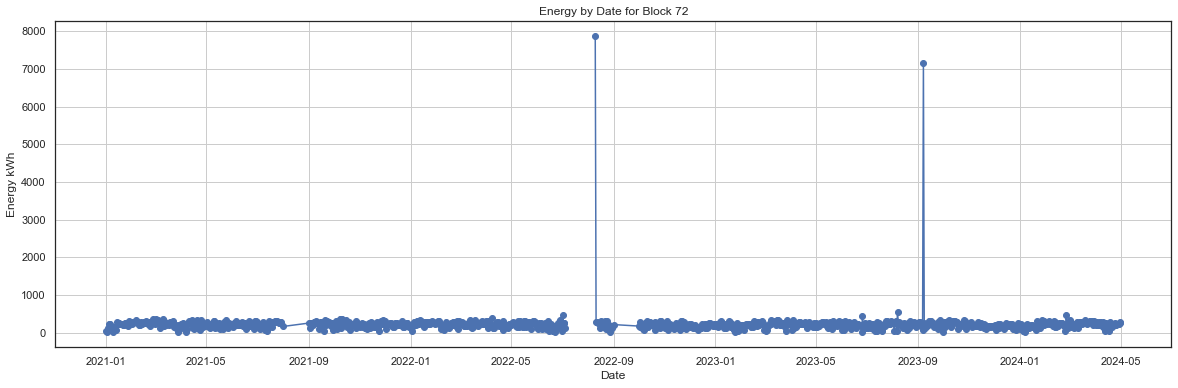

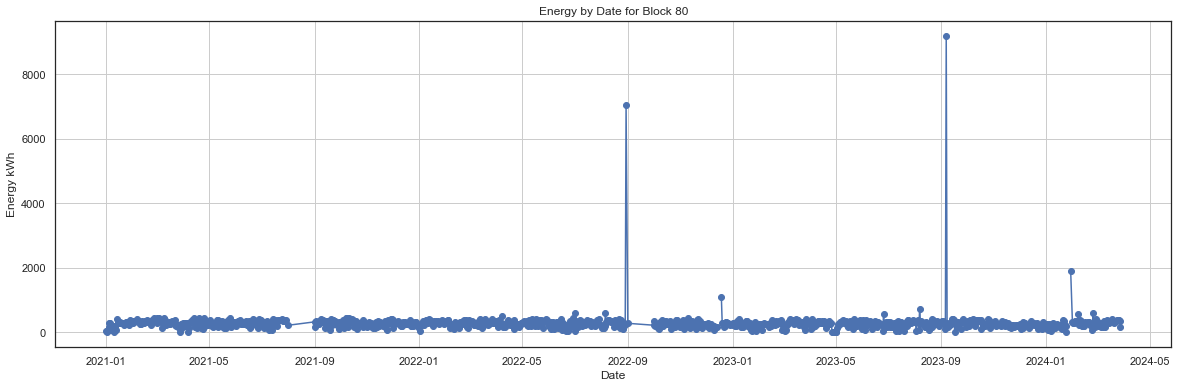

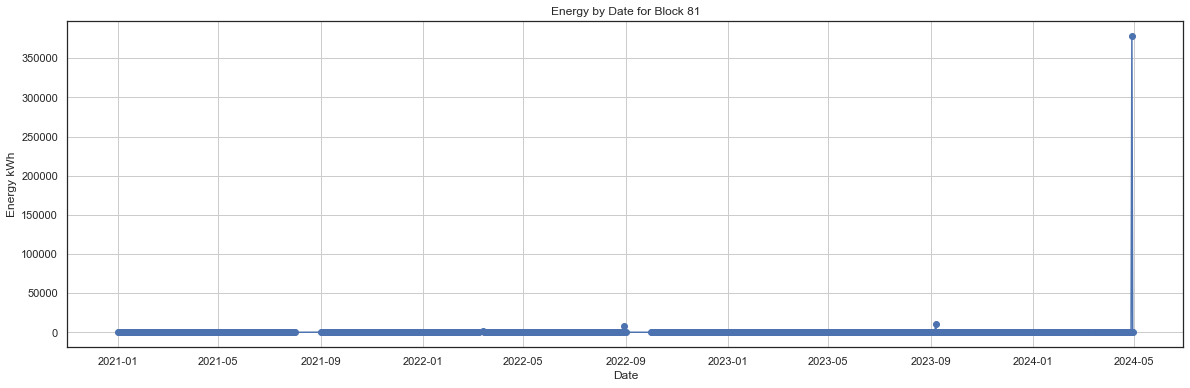

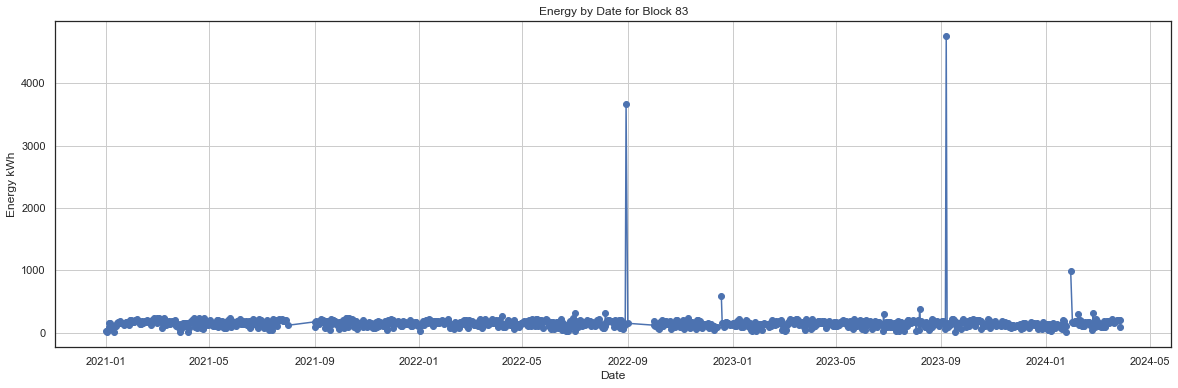

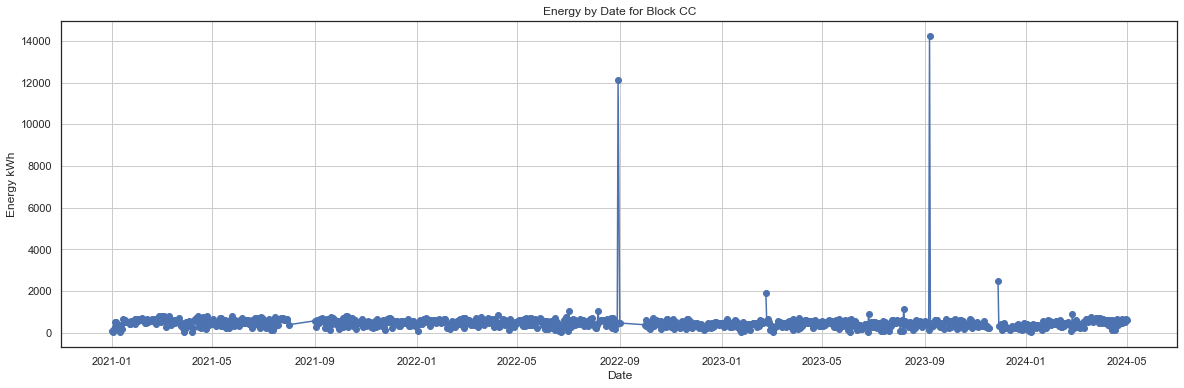

In [49]:
df_dpm['block'] = df_dpm['Location Code'].str[7:9]

# Energy generated per block by date
compare_loc = df_dpm.pivot_table(index='Date and Time', columns='block', values='Energy Generation', aggfunc='sum')

# Plot multiline chart
for block in compare_loc.columns:
    plt.figure(figsize=(20, 6))
    plt.plot(compare_loc.index, compare_loc[block], marker='o')
    plt.title(f'Energy by Date for Block {block}')
    plt.xlabel('Date')
    plt.ylabel('Energy kWh')
    plt.grid(True)
    plt.show()

### inverter sensor from estate office 

In [36]:
inv24_01 = pd.read_excel('Estate office Custom report for datasets/2024/INV/Energy_01Jan2024_To_30Jan2024__INV.xlsx')
inv24_02 = pd.read_excel('Estate office Custom report for datasets/2024/INV/Energy_01Feb2024_To_29Feb2024__INV.xlsx')
inv24_03 = pd.read_excel('Estate office Custom report for datasets/2024/INV/Energy_01Mar2024_To_30Mar2024__INV.xlsx')
inv24_04 = pd.read_excel('Estate office Custom report for datasets/2024/INV/Energy_01Apr2024_To_30Apr2024__INV.xlsx')

inv23_01 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Jan2023_To_30Jan2023_INV.xlsx')
inv23_02 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Feb2023_To_28Feb2023__INV.xlsx')
inv23_03 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Mar2023_To_30Mar2023__INV.xlsx')
inv23_04 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Apr2023_To_30Apr2023__INV.xlsx')
inv23_05 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01May2023_To_31May2023__INV.xlsx')
inv23_06 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Jun2023_To_30Jun2023__INV.xlsx')
inv23_07 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Jul2023_To_30Jul2023__INV.xlsx')
inv23_08 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Aug2023_To_30Aug2023__INV.xlsx')
inv23_09 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Sep2023_To_30Sep2023__INV.xlsx')
inv23_10 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Oct2023_To_30Oct2023__INV.xlsx')
inv23_11 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Nov2023_To_30Nov2023__INV.xlsx')
inv23_12 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Dec2023_To_30Dec2023__INV.xlsx')

inv22_01 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Jan2022_To_30Jan2022__INV.xlsx')
inv22_02 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Feb2022_To_28Feb2022__INV.xlsx')
inv22_03 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Mar2022_To_30Mar2022__INV.xlsx')
inv22_04 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Apr2022_To_30Apr2022__INV.xlsx')
inv22_05 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01May2022_To_30May2022__INV.xlsx')
inv22_06 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Jun2022_To_30Jun2022__INV.xlsx')
inv22_07 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Jul2022_To_30Jul2022__INV.xlsx')
inv22_08 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Aug2022_To_30Aug2022__INV.xlsx')
inv22_09 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Sep2022_To_30Sep2022__INV.xlsx')
inv22_10 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Oct2022_To_30Oct2022_INV.xlsx')
inv22_11 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Nov2022_To_30Nov2022__INV.xlsx')
inv22_12 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Dec2022_To_30Dec2022__INV.xlsx')

inv21_01 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Jan2021_To_30Jan2021__INV.xlsx')
inv21_02 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Feb2021_To_28Feb2021__INV.xlsx')
inv21_03 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Mar2021_To_30Mar2021__INV.xlsx')
inv21_04 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Apr2021_To_30Apr2021__INV.xlsx')
inv21_05 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01May2021_To_30May2021__INV.xlsx')
inv21_06 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Jun2021_To_30Jun2021__INV.xlsx')
inv21_07 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Jul2021_To_30Jul2021__INV.xlsx')
inv21_08 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Aug2021_To_01Aug2021__INV.xlsx')
inv21_09 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Sep2021_To_30Sep2021__INV.xlsx')
inv21_10 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Oct2021_To_30Oct2021__INV.xlsx')
inv21_11 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Nov2021_To_30Nov2021__INV.xlsx')
inv21_12 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Dec2021_To_30Dec2021__INV.xlsx')

inv21 = [inv21_01, inv21_02, inv21_03, inv21_04, inv21_05, inv21_06, inv21_07, inv21_08, inv21_09, inv21_10, inv21_11, inv21_12]
inv22 = [inv22_01, inv22_02, inv22_03, inv22_04, inv22_05, inv22_06, inv22_07, inv22_08, inv22_09, inv22_10, inv22_11, inv22_12]
inv23 = [inv23_01, inv23_02, inv23_03, inv23_04, inv23_05, inv23_06, inv23_07, inv23_08, inv23_09, inv23_10, inv23_11, inv23_12]
inv24 = [inv24_01, inv24_02, inv24_03, inv24_04]

# Concatenate DataFrames
df_inv = pd.concat(inv21 + inv22 + inv23 + inv24, axis=0)
df_inv

,Date and Time,Location Code,Energy kWh
0,2021-01-01,SN2-NAP47-599489,80.78
1,2021-01-01,SN2-NAP50-599489,54.21
2,2021-01-01,SN2-NAP83-599489,30.96
3,2021-01-01,SN2-NAPCC-599489,100.43
4,2021-01-01,SN2-NAP81-599489,31.08
...,...,...,...
348,2024-04-30,SN2-NAP81-599489,382.04
349,2024-04-30,SN2-NAP58-599489,298.36
350,2024-04-30,SN2-NAP52-599489,188.05
351,2024-04-30,SN2-NAP34-599489,164.25


In [37]:
df_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16084 entries, 0 to 352
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  16084 non-null  object 
 1   Location Code  16084 non-null  object 
 2   Energy kWh     16084 non-null  float64
dtypes: float64(1), object(2)
memory usage: 502.6+ KB


In [38]:
df_inv['block'] = df_inv['Location Code'].str[7:9]
df_inv

,Date and Time,Location Code,Energy kWh,block
0,2021-01-01,SN2-NAP47-599489,80.78,47
1,2021-01-01,SN2-NAP50-599489,54.21,50
2,2021-01-01,SN2-NAP83-599489,30.96,83
3,2021-01-01,SN2-NAPCC-599489,100.43,CC
4,2021-01-01,SN2-NAP81-599489,31.08,81
...,...,...,...,...
348,2024-04-30,SN2-NAP81-599489,382.04,81
349,2024-04-30,SN2-NAP58-599489,298.36,58
350,2024-04-30,SN2-NAP52-599489,188.05,52
351,2024-04-30,SN2-NAP34-599489,164.25,34


In [39]:
# Convert 'Date and Time' to datetime object
df_inv['Date and Time'] = pd.to_datetime(df_inv['Date and Time'])

# Extract month and year
df_inv['Month'] = df_inv['Date and Time'].dt.strftime('%Y-%m')

df_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16084 entries, 0 to 352
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and Time  16084 non-null  datetime64[ns]
 1   Location Code  16084 non-null  object        
 2   Energy kWh     16084 non-null  float64       
 3   block          16084 non-null  object        
 4   Month          16084 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 753.9+ KB


In [40]:
df_inv

,Date and Time,Location Code,Energy kWh,block,Month
0,2021-01-01,SN2-NAP47-599489,80.78,47,2021-01
1,2021-01-01,SN2-NAP50-599489,54.21,50,2021-01
2,2021-01-01,SN2-NAP83-599489,30.96,83,2021-01
3,2021-01-01,SN2-NAPCC-599489,100.43,CC,2021-01
4,2021-01-01,SN2-NAP81-599489,31.08,81,2021-01
...,...,...,...,...,...
348,2024-04-30,SN2-NAP81-599489,382.04,81,2024-04
349,2024-04-30,SN2-NAP58-599489,298.36,58,2024-04
350,2024-04-30,SN2-NAP52-599489,188.05,52,2024-04
351,2024-04-30,SN2-NAP34-599489,164.25,34,2024-04


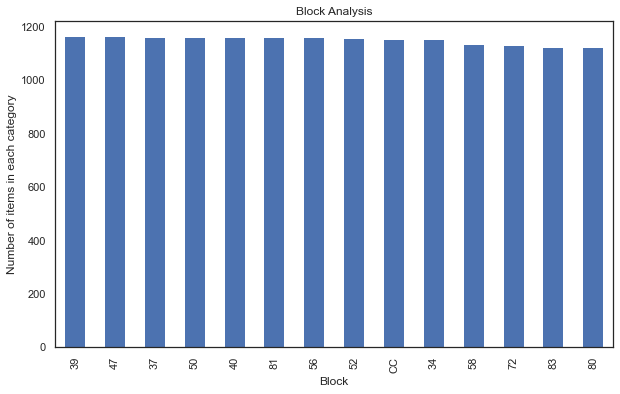

In [41]:
#exploring block
block_inv = df_inv['block'].value_counts() 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

block_inv.sort_values(ascending=False).plot(kind='bar', ax=ax)

ax.set_ylabel('Number of items in each category')
ax.set_xlabel('Block')
ax.set_title('Block Analysis')

plt.show()

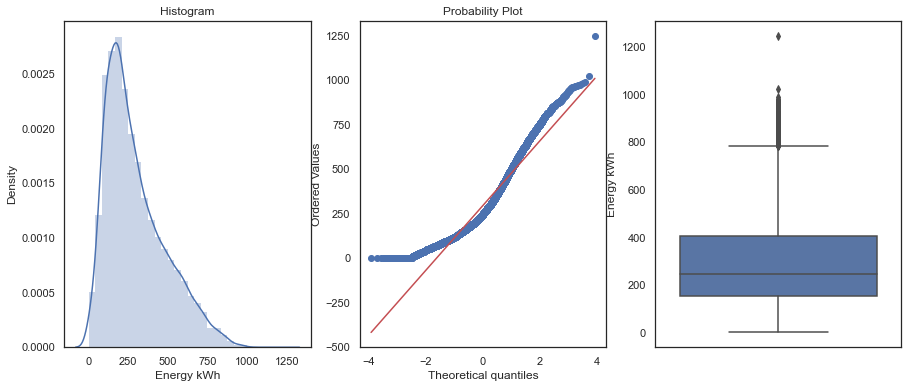

Number of outliers in Energy kWh: 269


In [42]:
#outlier detection
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 3, 1)
    plt.rcParams["patch.edgecolor"] = "none"
    sns.histplot(df[variable], bins=30, kde = True, stat ="density", kde_kws=dict(cut = 3),alpha = 0.30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])

    plt.show()
    
    # Count outliers using IQR method
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]

    print(f'Number of outliers in {variable}: {len(outliers)}')
    
diagnostic_plots(df_inv, 'Energy kWh')

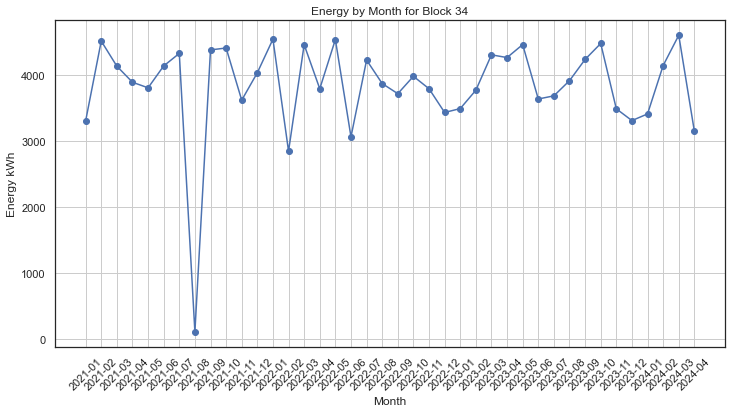

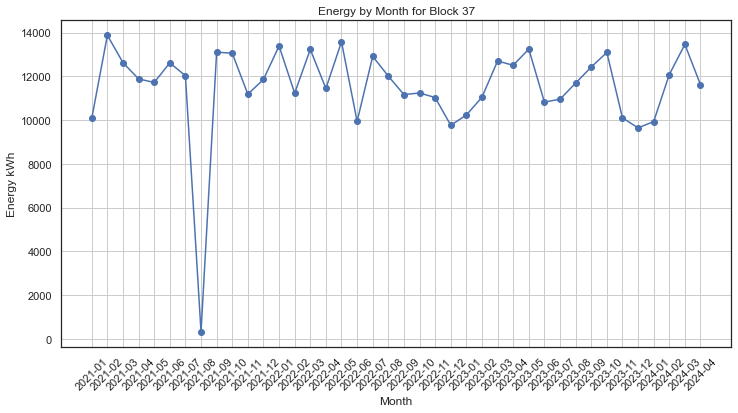

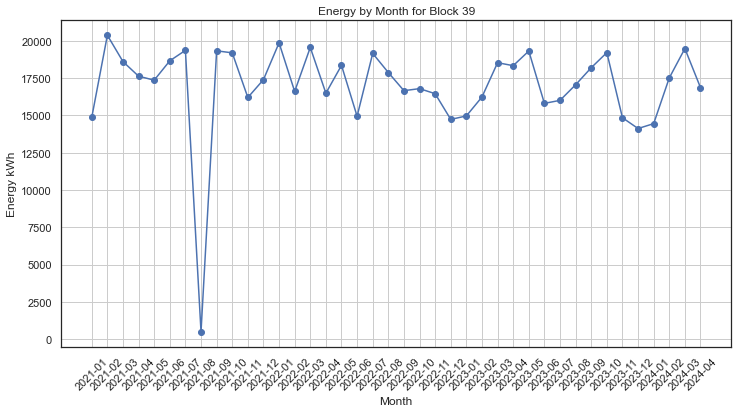

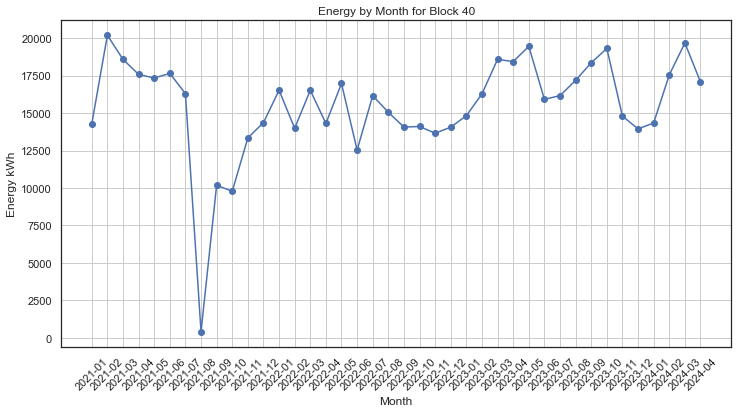

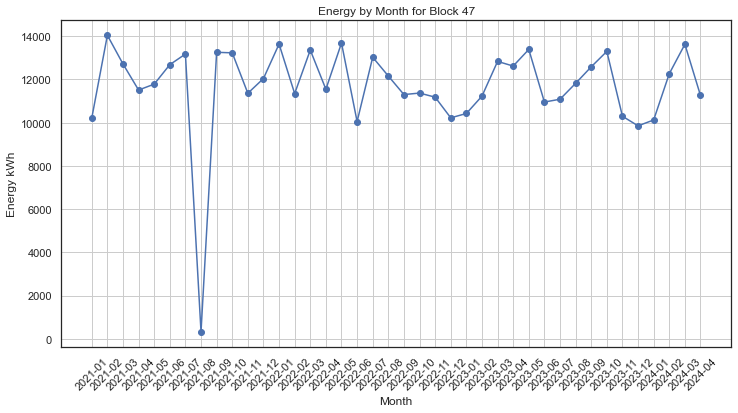

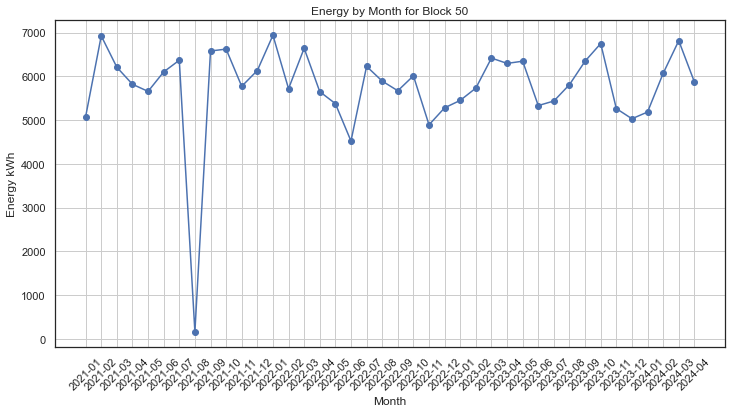

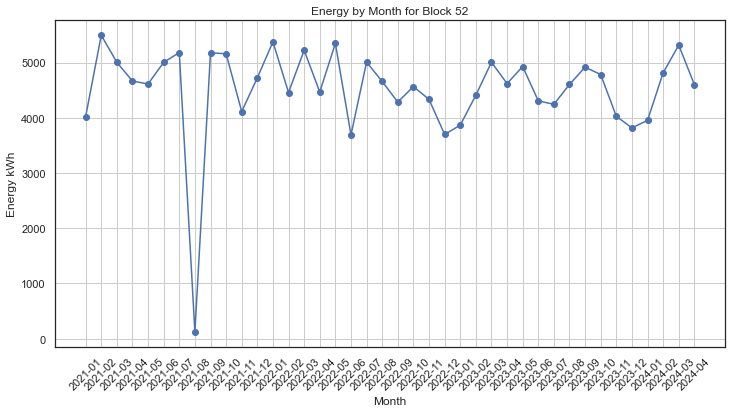

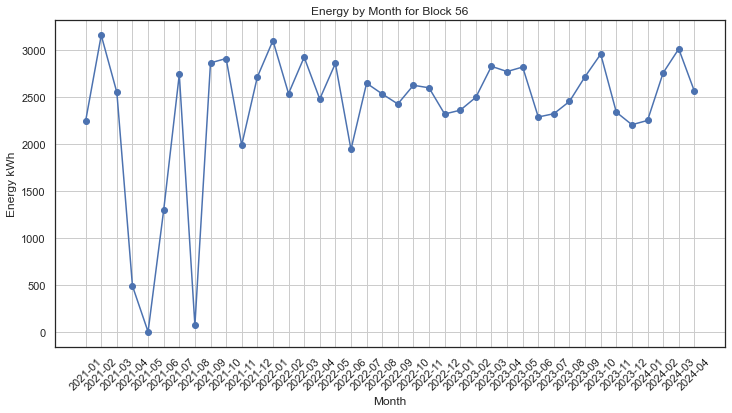

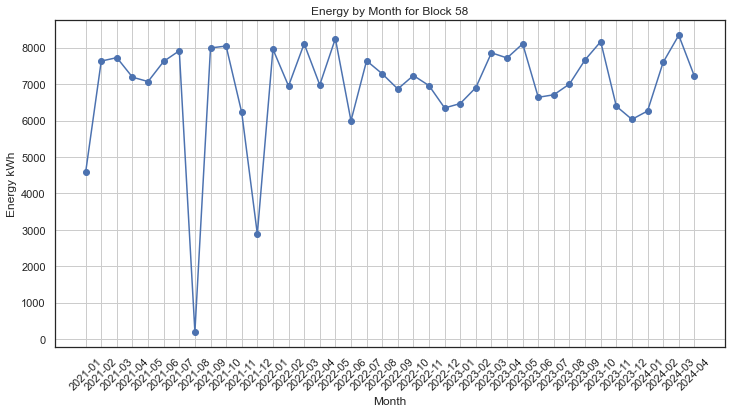

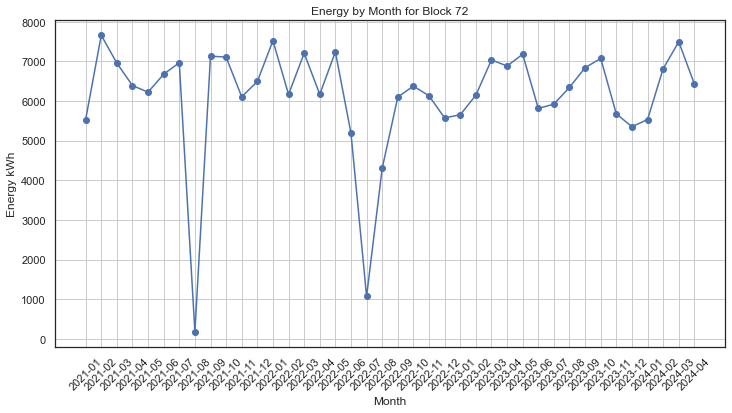

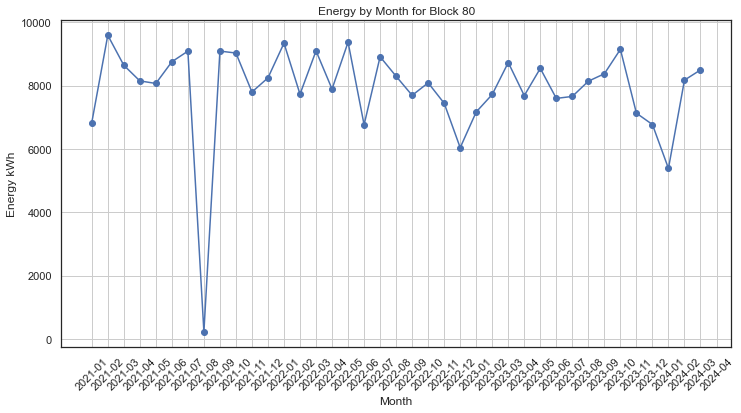

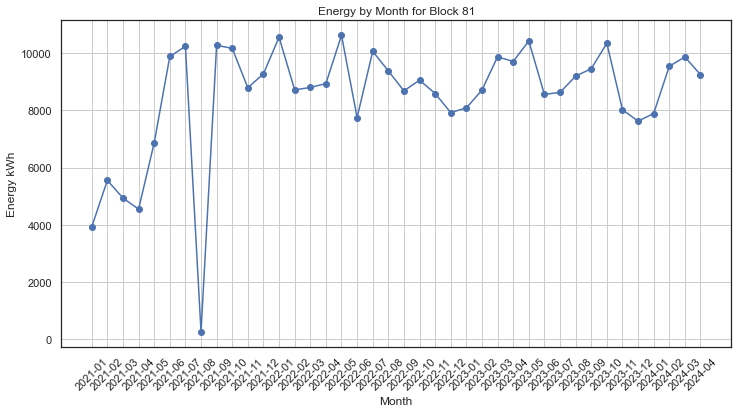

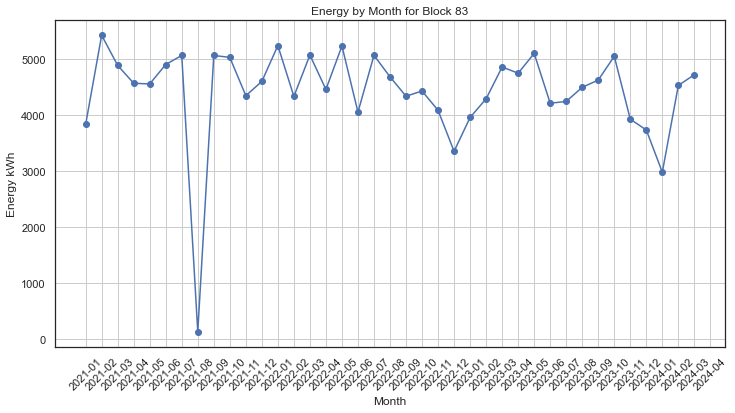

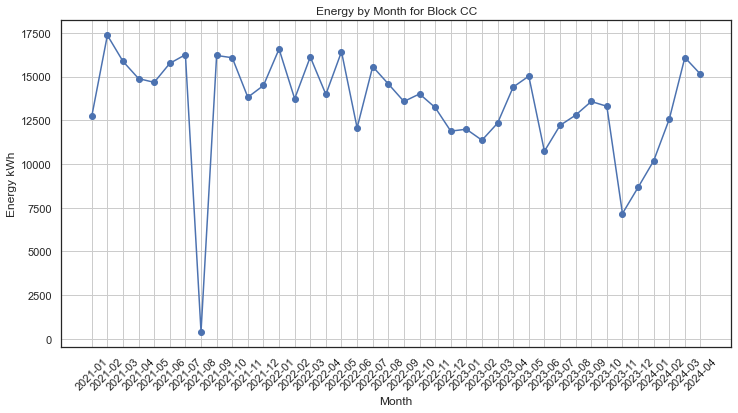

In [43]:
# Energy generated per block by month
grouped_data = df_inv.groupby(['Month', 'block'])['Energy kWh'].sum().unstack()

# Plot individual line charts for each block
for block in grouped_data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_data.index, grouped_data[block], marker='o')
    plt.title(f'Energy by Month for Block {block}')
    plt.xlabel('Month')
    plt.ylabel('Energy kWh')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

### IRR sensor from estate office 

In [44]:
irr24_01 = pd.read_excel('Estate office Custom report for datasets/2024/IRR/Energy_01Jan2024_To_30Jan2024__IRR.xlsx')
irr24_02 = pd.read_excel('Estate office Custom report for datasets/2024/IRR/Energy_01Feb2024_To_29Feb2024__IRR.xlsx')
irr24_03 = pd.read_excel('Estate office Custom report for datasets/2024/IRR/Energy_01Mar2024_To_30Mar2024__IRR.xlsx')
irr24_04 = pd.read_excel('Estate office Custom report for datasets/2024/IRR/Energy_01Apr2024_To_30Apr2024__IRR.xlsx')

irr23_01 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Jan2023_To_30Jan2023__IRR.xlsx')
irr23_02 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Feb2023_To_28Feb2023__IRR.xlsx')
irr23_03 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Mar2023_To_30Mar2023__IRR.xlsx')
irr23_04 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Apr2023_To_30Apr2023__IRR.xlsx')
irr23_05 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01May2023_To_30May2023__IRR.xlsx')
irr23_06 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Jun2023_To_30Jun2023__IRR.xlsx')
irr23_07 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Jul2023_To_30Jul2023__IRR.xlsx')
irr23_08 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Aug2023_To_30Aug2023__IRR.xlsx')
irr23_09 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Sep2023_To_30Sep2023__IRR.xlsx')
irr23_10 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Oct2023_To_30Oct2023__IRR.xlsx')
irr23_11 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Nov2023_To_30Nov2023__IRR.xlsx')
irr23_12 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Dec2023_To_30Dec2023_IRR.xlsx')

irr22_01 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Jan2022_To_30Jan2022_IRR.xlsx')
irr22_02 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Feb2022_To_28Feb2022__IRR.xlsx')
irr22_03 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Mar2022_To_30Mar2022__IRR.xlsx')
irr22_04 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Apr2022_To_30Apr2022__IRR.xlsx')
irr22_05 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01May2022_To_30May2022__IRR.xlsx')
irr22_06 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Jun2022_To_30Jun2022__IRR.xlsx')
irr22_07 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Jul2022_To_30Jul2022__IRR.xlsx')
irr22_08 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Aug2022_To_30Aug2022__IRR.xlsx')
irr22_09 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Sep2022_To_30Sep2022__IRR.xlsx')
irr22_10 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Oct2022_To_30Oct2022__IRR.xlsx')
irr22_11 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Nov2022_To_30Nov2022__IRR.xlsx')
irr22_12 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Dec2022_To_30Dec2022__IRR.xlsx')

#irr21_01 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Jan2021_To_30Jan2021__IRR.xlsx')
irr21_02 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Feb2021_To_28Feb2021_IRR.xlsx')
irr21_03 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Mar2021_To_30Mar2021__IRR.xlsx')
irr21_04 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Apr2021_To_30Apr2021__IRR.xlsx')
irr21_05 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01May2021_To_30May2021__IRR.xlsx')
irr21_06 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Jun2021_To_30Jun2021__IRR.xlsx')
irr21_07 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Jul2021_To_30Jul2021__IRR.xlsx')
irr21_08 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Aug2021_To_01Aug2021__IRR.xlsx')
irr21_09 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Sep2021_To_30Sep2021__IRR.xlsx')
irr21_10 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Oct2021_To_30Oct2021__IRR.xlsx')
irr21_11 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Nov2021_To_30Nov2021__IRR.xlsx')
irr21_12 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Dec2021_To_30Dec2021_IRR.xlsx')

#irr21 = [irr21_01, irr21_02, irr21_03, irr21_04, irr21_05, irr21_06, irr21_07, irr21_08, irr21_09, irr21_10, irr21_11, irr21_12]
irr21 = [irr21_02, irr21_03, irr21_04, irr21_05, irr21_06, irr21_07, irr21_08, irr21_09, irr21_10, irr21_11, irr21_12]
irr22 = [irr22_01, irr22_02, irr22_03, irr22_04, irr22_05, irr22_06, irr22_07, irr22_08, irr22_09, irr22_10, irr22_11, irr22_12]
irr23 = [irr23_01, irr23_02, irr23_03, irr23_04, irr23_05, irr23_06, irr23_07, irr23_08, irr23_09, irr23_10, irr23_11, irr23_12]
irr24 = [irr24_01, irr24_02, irr24_03, irr24_04]

# Concatenate DataFrames
df_irr = pd.concat(irr21 + irr22 + irr23 + irr24, axis=0)
df_irr

,Date and Time,Location Code,Energy kWh
0,2021-02-04,SN2-NAP81-599489,2960.220
1,2021-02-05,SN2-NAP81-599489,5001.969
2,2021-02-06,SN2-NAP81-599489,6093.192
3,2021-02-07,SN2-NAP81-599489,5217.032
4,2021-02-08,SN2-NAP81-599489,5158.957
...,...,...,...
25,2024-04-26,SN2-NAP81-599489,4379.833
26,2024-04-27,SN2-NAP81-599489,4268.050
27,2024-04-28,SN2-NAP81-599489,3990.756
28,2024-04-29,SN2-NAP81-599489,5386.331


In [45]:
df_irr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  1124 non-null   object 
 1   Location Code  1124 non-null   object 
 2   Energy kWh     1124 non-null   float64
dtypes: float64(1), object(2)
memory usage: 35.1+ KB


In [46]:
df_irr['block'] = df_irr['Location Code'].str[7:9]
df_irr

,Date and Time,Location Code,Energy kWh,block
0,2021-02-04,SN2-NAP81-599489,2960.220,81
1,2021-02-05,SN2-NAP81-599489,5001.969,81
2,2021-02-06,SN2-NAP81-599489,6093.192,81
3,2021-02-07,SN2-NAP81-599489,5217.032,81
4,2021-02-08,SN2-NAP81-599489,5158.957,81
...,...,...,...,...
25,2024-04-26,SN2-NAP81-599489,4379.833,81
26,2024-04-27,SN2-NAP81-599489,4268.050,81
27,2024-04-28,SN2-NAP81-599489,3990.756,81
28,2024-04-29,SN2-NAP81-599489,5386.331,81


In [47]:
# Convert 'Date and Time' to datetime object
df_irr['Date and Time'] = pd.to_datetime(df_irr['Date and Time'])

# Extract month and year
df_irr['Month'] = df_irr['Date and Time'].dt.strftime('%Y-%m')

df_irr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and Time  1124 non-null   datetime64[ns]
 1   Location Code  1124 non-null   object        
 2   Energy kWh     1124 non-null   float64       
 3   block          1124 non-null   object        
 4   Month          1124 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 52.7+ KB


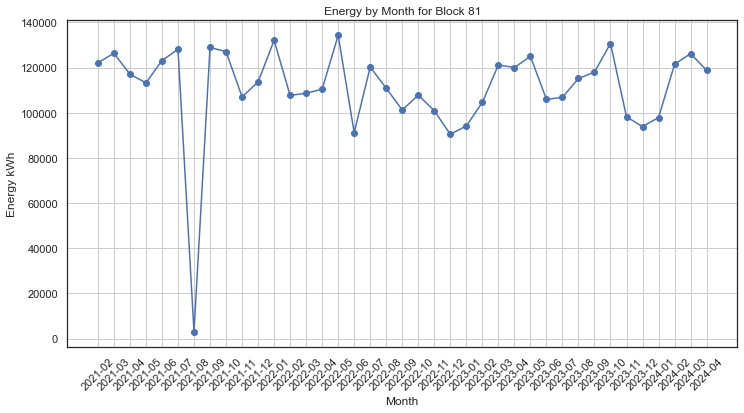

In [48]:
# Energy generated per block by month
irr_grouped = df_irr.groupby(['Month', 'block'])['Energy kWh'].sum().unstack()

# Plot individual line charts for each block
for block in irr_grouped.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(irr_grouped.index, irr_grouped[block], marker='o')
    plt.title(f'Energy by Month for Block {block}')
    plt.xlabel('Month')
    plt.ylabel('Energy kWh')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()